<a href="https://colab.research.google.com/github/Dianaaleja/travel_tide_customer_segment/blob/main/Mastery_Project_Traveltide_Final_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Once my final table was prepared—cleaned, filtered, and consolidated at the user level—it was ready for the next stage of customer analysis, providing a clear overview of how the data is distributed
* This ensures the optimized table is quicker and more efficient for the system to process and access.
* Obtained from "https://colab.research.google.com/drive/1f9FoQX25YgtbViBj2Hr4s7NSzUmBA_Fz?usp=sharing"

### Import libraries

In [ ]:
import pandas as pd
import sqlalchemy as sa
import numpy as np
import math
from math import radians, atan2, sqrt, sin, cos
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import text
import pandas as pd
from plotly.graph_objects import *
from seaborn import pairplot
import plotly.express  as px
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

In [ ]:
#Upload the new or final table in the new notebook Colab
from google.colab import drive

# Upload the file
drive.mount('/content/drive')

# Read the csv data
final_table = pd.read_csv('/content/drive/MyDrive/final_table_filtered.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read the file using pandas
import pandas as pd

# Load the CSV file into a DataFrame
final_table_filtered = pd.read_csv('/content/drive/MyDrive/final_table_filtered.csv')

# Display the first few rows
final_table_filtered.head()

session_id  user_id  \
0   23557-3f6bd6be250e45959b33b808ac525df6    23557   
1  120851-bfeb515377f44fdbbb9d9642dc0c7178   120851   
2  149058-6718f71e85ab413394e32abf5c49f978   149058   
3  229108-d2b0f9bc7aea425189cb943fa1706810   229108   
4  264470-71e8f4d269aa44308aa34ffd1c2d0c18   264470   

                                   trip_id        session_start  \
0                                        0  2023-01-04 19:30:00   
1                                        0  2023-01-04 19:49:00   
2  149058-0562d645484d450b8908ae40825aaf46  2023-01-04 13:30:00   
3                                        0  2023-01-04 20:44:00   
4                                        0  2023-01-04 22:50:00   

           session_end  page_clicks  flight_discount  flight_discount_amount  \
0  2023-01-04 19:33:53           32            False                     0.0   
1  2023-01-04 19:49:37            5            False                     0.0   
2  2023-01-04 13:31:57           16            False                     0.0   
3  2023-01-04 20:45:29           12             True                     0.2   
4  2023-01-04 22:50:59            8            False                     0.0   

   hotel_discount  hotel_discount_amount  ...  destination_airport_lon  \
0           False                    0.0  ...                    0.000   
1           False                    0.0  ...                    0.000   
2           False                    0.0  ...                 -118.408   
3           False                    0.0  ...                    0.000   
4           False                    0.0  ...                    0.000   

   base_fare_usd           hotel_name  nights rooms  \
0            0.0                    0     0.0   0.0   
1            0.0                    0     0.0   0.0   
2          461.8  Accor - los angeles     0.0   1.0   
3            0.0                    0     0.0   0.0   
4            0.0                    0     0.0   0.0   

                check_in_time       check_out_time  \
0                           0                    0   
1                           0                    0   
2  2023-01-09 15:38:38.175000  2023-01-10 11:00:00   
3                           0                    0   
4                           0                    0   

   hotel_price_per_room_night_usd age session_duration_min  
0                             0.0  66                233.0  
1                             0.0  52                 37.0  
2                           206.0  51                117.0  
3                             0.0  26                 89.0  
4                             0.0  46                 59.0  

[5 rows x 44 columns]

In [ ]:
final_table_filtered.keys()

Index(['session_id', 'user_id', 'trip_id', 'session_start', 'session_end',
       'page_clicks', 'flight_discount', 'flight_discount_amount',
       'hotel_discount', 'hotel_discount_amount', 'flight_booked',
       'hotel_booked', 'cancellation', 'session_duration', 'birthdate',
       'gender', 'married', 'has_children', 'home_country', 'home_city',
       'home_airport', 'home_airport_lat', 'home_airport_lon', 'sign_up_date',
       'origin_airport', 'destination', 'destination_airport', 'seats',
       'return_flight_booked', 'departure_time', 'return_time', 'checked_bags',
       'trip_airline', 'destination_airport_lat', 'destination_airport_lon',
       'base_fare_usd', 'hotel_name', 'nights', 'rooms', 'check_in_time',
       'check_out_time', 'hotel_price_per_room_night_usd', 'age',
       'session_duration_min'],
      dtype='object')

Based on Elena’s instructions my session-level dataset is with 49,211 rows.

In [ ]:
final_table_filtered.shape

(49211, 44)

We only include users who traveled with Travel Tide, this means that we only keep rows that are not empty or unknown, but at least the user made one trip.

In [ ]:
final_table_filtered = final_table_filtered[final_table_filtered['trip_id'] != '0']
final_table_filtered

session_id  user_id  \
2      149058-6718f71e85ab413394e32abf5c49f978   149058   
6      349132-14d7bf94bf9b4f968d5fe6dad41ecced   349132   
8      380874-05339fd92d834720802cfe6ea11f8fca   380874   
11     400275-f1606597e5b247ada5bb00be8a43d42d   400275   
13     407250-8a0a1f8f48a84e6e9d70f3582d350b43   407250   
...                                        ...      ...   
49206  589228-c82de5b13d8d4739aeb90e2ca924d2e0   589228   
49207  671151-fa865fb0bf8249aeb164408b470322d2   671151   
49208  609393-17fa2042385e48faac6ab20586749340   609393   
49209  562275-67b9889219d14b96b4cbdab763e094af   562275   
49210  591582-98ac1bd6d6824ad0b2831e9b93c50703   591582   

                                       trip_id        session_start  \
2      149058-0562d645484d450b8908ae40825aaf46  2023-01-04 13:30:00   
6      349132-e1efc771d650473cafce78596f667408  2023-01-04 19:46:00   
8      380874-1f29a1cd5b964153ab337c08a4c5a151  2023-01-04 17:18:00   
11     400275-f11d25e1bd574bbfa8892ea675a3dbdf  2023-01-04 06:13:00   
13     407250-9152c91fdf754cffbb345776da107919  2023-01-04 01:10:00   
...                                        ...                  ...   
49206  589228-7cbd8bd73eed4c549a0074919e71fdc8  2023-07-20 21:01:17   
49207  671151-a25acb9062764a168fbd4286d15d57fd  2023-07-24 17:45:47   
49208  609393-b92d487037ec447db1e3ddf977709a52  2023-07-21 21:02:05   
49209  562275-5b2550a902f14543a77ca64eccdce8f8  2023-07-21 21:17:07   
49210  591582-61f9e9bfb2dd461989dacc9f5b76371b  2023-07-21 10:24:10   

                      session_end  page_clicks  flight_discount  \
2             2023-01-04 13:31:57           16            False   
6             2023-01-04 19:48:11           18            False   
8             2023-01-04 17:20:18           19            False   
11            2023-01-04 06:19:34           52             True   
13            2023-01-04 01:12:27           20            False   
...                           ...          ...              ...   
49206  2023-07-20 21:45:04.905844           43             True   
49207  2023-07-24 18:09:14.839854           23             True   
49208  2023-07-21 21:27:18.179946           25             True   
49209  2023-07-21 23:17:07.000000          139             True   
49210  2023-07-21 10:34:10.000000           10             True   

       flight_discount_amount  hotel_discount  hotel_discount_amount  ...  \
2                        0.00           False                   0.00  ...   
6                        0.00           False                   0.00  ...   
8                        0.00            True                   0.25  ...   
11                       0.25           False                   0.00  ...   
13                       0.00           False                   0.00  ...   
...                       ...             ...                    ...  ...   
49206                    0.00            True                   0.00  ...   
49207                    0.00            True                   0.00  ...   
49208                    0.00            True                   0.00  ...   
49209                    0.00            True                   0.00  ...   
49210                    0.00            True                   0.00  ...   

       destination_airport_lon  base_fare_usd                      hotel_name  \
2                     -118.408         461.80             Accor - los angeles   
6                      -73.779         494.70    InterContinental  - new york   
8                     -122.375         662.69  Extended Stay  - san francisco   
11                     -75.241         625.36     Crowne Plaza - philadelphia   
13                     -79.370         441.23                               0   
...                        ...            ...                             ...   
49206                  -97.601         314.29        Rosewood - oklahoma city   
49207                  -73.779         414.03                               0   
49208          

In [ ]:
# With removing or avoiding the empty rows on trip_id we have now 16702 rows
final_table_filtered.shape

(16702, 44)

In [ ]:
final_table_filtered.describe()

user_id   page_clicks  flight_discount_amount  \
count   16702.000000  16702.000000            16702.000000   
mean   542493.728595     29.609328                0.020252   
std     62389.173380     29.379596                0.058736   
min     23557.000000      7.000000                0.000000   
25%    516287.000000     18.000000                0.000000   
50%    537926.000000     22.000000                0.000000   
75%    570222.750000     29.000000                0.000000   
max    811077.000000    566.000000                0.600000   

       hotel_discount_amount  session_duration  home_airport_lat  \
count           16702.000000      16702.000000      16702.000000   
mean                0.014813        386.051631         38.514198   
std                 0.043794       1099.675568          6.093100   
min                 0.000000         54.000000         21.316000   
25%                 0.000000        134.000000         33.942000   
50%                 0.000000        163.000000         39.175000   
75%                 0.000000        217.000000         42.276000   
max                 0.450000       7200.000000         61.251000   

       home_airport_lon         seats  checked_bags  destination_airport_lat  \
count      16702.000000  16702.000000  16702.000000             16702.000000   
mean         -93.891353      1.038259      0.506586                32.987968   
std           17.856111      0.690659      0.660355                15.057785   
min         -157.927000      0.000000      0.000000               -37.008000   
25%         -112.008000      1.000000      0.000000                31.849000   
50%          -89.977000      1.000000      0.000000                37.619000   
75%          -78.732000      1.000000      1.000000                41.786000   
max          -63.499000      8.000000      8.000000                55.972000   

       destination_airport_lon  base_fare_usd        nights         rooms  \
count             16702.000000   16702.000000  16702.000000  16702.000000   
mean                -75.995485     449.324202      3.250868      1.053227   
std                  43.816137     778.787942      3.754971      0.607208   
min                -157.927000       0.000000      0.000000      0.000000   
25%                -106.380000     106.470000      1.000000      1.000000   
50%                 -83.010000     319.585000      2.000000      1.000000   
75%                 -73.779000     555.290000      4.000000      1.000000   
max                 174.792000   21548.040000     43.000000      4.000000   

       hotel_price_per_room_night_usd           age  session_duration_min  
count                    16702.000000  16702.000000          16702.000000  
mean                       156.885762     43.168423            386.051631  
std                        125.096673      9.712122           1099.675568  
min                          0.000000     18.000000             54.000000  
25%                         80.000000     38.000000            134.000000  
50%                        133.000000     43.000000            163.000000  
75%                        208.000000     49.000000            217.000000  
max                       1376.000000     86.000000           7200.000000

In [ ]:
final_table_filtered.columns

Index(['session_id', 'user_id', 'trip_id', 'session_start', 'session_end',
       'page_clicks', 'flight_discount', 'flight_discount_amount',
       'hotel_discount', 'hotel_discount_amount', 'flight_booked',
       'hotel_booked', 'cancellation', 'session_duration', 'birthdate',
       'gender', 'married', 'has_children', 'home_country', 'home_city',
       'home_airport', 'home_airport_lat', 'home_airport_lon', 'sign_up_date',
       'origin_airport', 'destination', 'destination_airport', 'seats',
       'return_flight_booked', 'departure_time', 'return_time', 'checked_bags',
       'trip_airline', 'destination_airport_lat', 'destination_airport_lon',
       'base_fare_usd', 'hotel_name', 'nights', 'rooms', 'check_in_time',
       'check_out_time', 'hotel_price_per_room_night_usd', 'age',
       'session_duration_min'],
      dtype='object')

Part of EDA is look the Data Types and to convert in the right Data Types (timestamp, text, float) to make the corresponding aggregations.




In [ ]:
# Columns list to convert the text date in a timestamp type
columns_to_convert = ['birthdate', 'session_start', 'session_end', 'check_in_time', 'check_out_time', 'departure_time', 'return_time']

# Converting listed columns to datetime format
final_table_filtered[columns_to_convert] = final_table_filtered[columns_to_convert].apply(pd.to_datetime, errors='coerce')

# Verifing the data types
final_table_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16702 entries, 2 to 49210
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   session_id                      16702 non-null  object        
 1   user_id                         16702 non-null  int64         
 2   trip_id                         16702 non-null  object        
 3   session_start                   16702 non-null  datetime64[ns]
 4   session_end                     15696 non-null  datetime64[ns]
 5   page_clicks                     16702 non-null  int64         
 6   flight_discount                 16702 non-null  bool          
 7   flight_discount_amount          16702 non-null  float64       
 8   hotel_discount                  16702 non-null  bool          
 9   hotel_discount_amount           16702 non-null  float64       
 10  flight_booked                   16702 non-null  bool          
 11  hotel_b

### Removing and identifying outliers

"Extreme values will skew the arithmetic average and other measures of central tendency and generally skew our perception of the data."

Steps:
1. Identify the columns from which we will remove outliers for our future analysis: Page_clicks, session_duration,
2. Visualize the distribution of your data to identify outliers



### Analysing Outliers column page_clicks

<Axes: xlabel='page_clicks', ylabel='Count'>

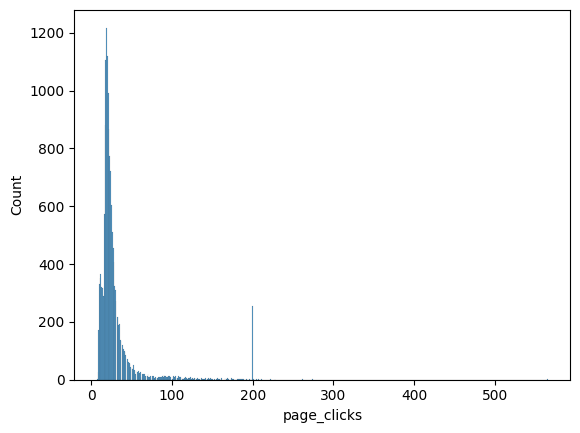

In [ ]:
#Example plots histograms and box plots for numeric columns
numeric_cols = final_table_filtered['page_clicks']

#Using seaborn's histplot to visualize data distributions
sns.histplot(numeric_cols)

# Hint: You can use seaborn's histplot and boxplot to visualize data distributions
# sns.histplot(cohort_s['your_column'])
# sns.boxplot(x=cohort_s['your_column'])

# The graphs above should help you define your outlier thresholds


# Filter out outliers based on the thresholds you define from graphs
# Hint: Use boolean indexing to filter out the rows that exceed your threshold

<Axes: xlabel='page_clicks'>

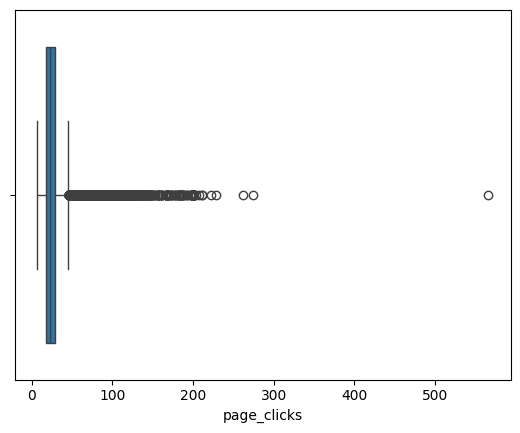

In [ ]:
# Using seaborn's boxplot to visualize data distributions
sns.boxplot(x=numeric_cols)

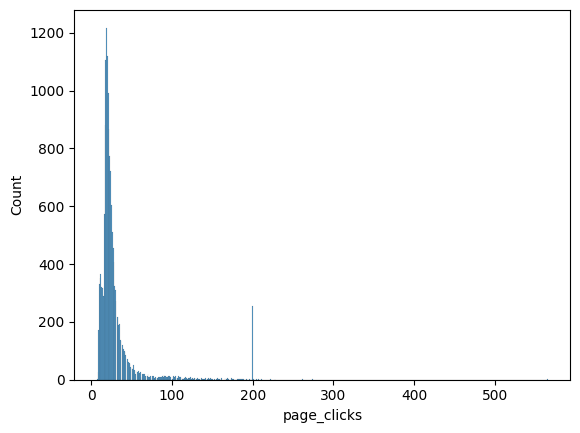

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = final_table_filtered['page_clicks'].quantile(0.0)
Q3 = final_table_filtered['page_clicks'].quantile(0.85)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
data_without_outliers = final_table_filtered[(final_table_filtered['page_clicks'] >= lower_bound) & (final_table_filtered['page_clicks'] <= upper_bound)]

# Visualize the filtered data
sns.histplot(final_table_filtered['page_clicks'])
plt.show()

In [ ]:
final_table_filtered.head()

session_id  user_id  \
2   149058-6718f71e85ab413394e32abf5c49f978   149058   
6   349132-14d7bf94bf9b4f968d5fe6dad41ecced   349132   
8   380874-05339fd92d834720802cfe6ea11f8fca   380874   
11  400275-f1606597e5b247ada5bb00be8a43d42d   400275   
13  407250-8a0a1f8f48a84e6e9d70f3582d350b43   407250   

                                    trip_id       session_start  \
2   149058-0562d645484d450b8908ae40825aaf46 2023-01-04 13:30:00   
6   349132-e1efc771d650473cafce78596f667408 2023-01-04 19:46:00   
8   380874-1f29a1cd5b964153ab337c08a4c5a151 2023-01-04 17:18:00   
11  400275-f11d25e1bd574bbfa8892ea675a3dbdf 2023-01-04 06:13:00   
13  407250-9152c91fdf754cffbb345776da107919 2023-01-04 01:10:00   

           session_end  page_clicks  flight_discount  flight_discount_amount  \
2  2023-01-04 13:31:57           16            False                    0.00   
6  2023-01-04 19:48:11           18            False                    0.00   
8  2023-01-04 17:20:18           19            False                    0.00   
11 2023-01-04 06:19:34           52             True                    0.25   
13 2023-01-04 01:12:27           20            False                    0.00   

    hotel_discount  hotel_discount_amount  ...  destination_airport_lon  \
2            False                   0.00  ...                 -118.408   
6            False                   0.00  ...                  -73.779   
8             True                   0.25  ...                 -122.375   
11           False                   0.00  ...                  -75.241   
13           False                   0.00  ...                  -79.370   

    base_fare_usd                      hotel_name  nights rooms  \
2          461.80             Accor - los angeles     0.0   1.0   
6          494.70    InterContinental  - new york     3.0   3.0   
8          662.69  Extended Stay  - san francisco     1.0   1.0   
11         625.36     Crowne Plaza - philadelphia     4.0   1.0   
13         441.23                               0     0.0   0.0   

             check_in_time      check_out_time  \
2  2023-01-09 15:38:38.175 2023-01-10 11:00:00   
6  2023-01-13 12:10:53.580 2023-01-17 11:00:00   
8  2023-01-10 12:59:57.480 2023-01-12 11:00:00   
11 2023-01-11 20:12:00.495 2023-01-16 11:00:00   
13                     NaT                 NaT   

    hotel_price_per_room_night_usd age session_duration_min  
2                            206.0  51                117.0  
6                            111.0  49                131.0  
8                            304.0  54                138.0  
11                           263.0  56                394.0  
13                             0.0  37                147.0  

[5 rows x 44 columns]

In [ ]:
final_table_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16702 entries, 2 to 49210
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   session_id                      16702 non-null  object        
 1   user_id                         16702 non-null  int64         
 2   trip_id                         16702 non-null  object        
 3   session_start                   16702 non-null  datetime64[ns]
 4   session_end                     15696 non-null  datetime64[ns]
 5   page_clicks                     16702 non-null  int64         
 6   flight_discount                 16702 non-null  bool          
 7   flight_discount_amount          16702 non-null  float64       
 8   hotel_discount                  16702 non-null  bool          
 9   hotel_discount_amount           16702 non-null  float64       
 10  flight_booked                   16702 non-null  bool          
 11  hotel_b

### Tracking Behavior: Aggregations on user level Data without outliers

Steps
1. Check the correct data type
2. Be sure that column to evaluate represents the meaning we want to obtain and is aggregated correctly.
3. Perform Pre-Aggregation Calculations
If the column needs to account for additional factors like the number of nights and rooms, create a new column in the DataFrame before aggregation.
4. Aggregate the Correct Metric
Use the column you computed to ensure accurate aggregation
5. Double-Check Units and Labels
Ensure your units align with your desired interpretation (e.g., minutes vs. seconds, per night vs. total cost).
Rename columns in the output for clarity
6. Test a Sample Case
Manually calculate the value for a few rows to verify the correctness of your aggregation

In [ ]:
final_table_filtered.keys()

Index(['session_id', 'user_id', 'trip_id', 'session_start', 'session_end',
       'page_clicks', 'flight_discount', 'flight_discount_amount',
       'hotel_discount', 'hotel_discount_amount', 'flight_booked',
       'hotel_booked', 'cancellation', 'session_duration', 'birthdate',
       'gender', 'married', 'has_children', 'home_country', 'home_city',
       'home_airport', 'home_airport_lat', 'home_airport_lon', 'sign_up_date',
       'origin_airport', 'destination', 'destination_airport', 'seats',
       'return_flight_booked', 'departure_time', 'return_time', 'checked_bags',
       'trip_airline', 'destination_airport_lat', 'destination_airport_lon',
       'base_fare_usd', 'hotel_name', 'nights', 'rooms', 'check_in_time',
       'check_out_time', 'hotel_price_per_room_night_usd', 'age',
       'session_duration_min'],
      dtype='object')

### Calculate the time spent from sign_up_date and the current date

In [ ]:
# To calculate the time spent fron sign_up_date and the current date
current_date = pd.Timestamp.now()

final_table_filtered['sign_up_date'] = pd.to_datetime(final_table_filtered['sign_up_date'], errors='coerce')

final_table_filtered['time_spent'] = (current_date - final_table_filtered['sign_up_date']).dt.total_seconds() / 60

### Calculate the number of flights

In [ ]:
final_table_filtered['num_flights'] = np.where(
    final_table_filtered['flight_booked'] & final_table_filtered['return_flight_booked'], 2,  # Condition 1: Both flights booked 2
    np.where(final_table_filtered['flight_booked'], 1, 0)                     # Condition 2: Only one flight booked, otherwise 0
)

# Si deseas calcular el total de 'n_flights' (sumarlos)
num_flights = final_table_filtered['num_flights'].sum()

### Aggregation how much did the user spend on the hotel?

In [ ]:
# Replace null values ​​in 'hotel_discount_amount' with 0
#data['hotel_discount_amount'] = data['hotel_discount_amount'].fillna(0)

# Calculate hotel spending per row
final_table_filtered['money_spent_hotel'] = (
    final_table_filtered['hotel_price_per_room_night_usd'] * final_table_filtered['nights'] * final_table_filtered['rooms'] * (1 - final_table_filtered['hotel_discount_amount'])
)

# Calculate total hotel spending
total_money_spent_hotel = final_table_filtered['money_spent_hotel'].sum()

### Aggregation how much did the user spend on flights?



In [ ]:
# Ensure flight_discount_amount has no NaN values (replace them with 0 if necessary)
final_table_filtered['flight_discount_amount'] = final_table_filtered['flight_discount_amount'].fillna(0)

# Calculate the amount spent on flights
final_table_filtered['total_flight_spend'] = final_table_filtered['base_fare_usd'] * (1 - final_table_filtered['flight_discount_amount'])

# Display the results
final_table_filtered[['user_id', 'base_fare_usd', 'flight_discount_amount', 'total_flight_spend']]
total_money_spent_flights = final_table_filtered['total_flight_spend'].sum()
total_money_spent_flights

7364115.055000001

### How far in advance of the trip did the client make their reservation? (avg)

In [ ]:
# Ensure that the 'departure_time' and 'session_end' columns are in datetime format
final_table_filtered['departure_time'] = pd.to_datetime(final_table_filtered['departure_time'], errors='coerce')
final_table_filtered['session_end'] = pd.to_datetime(final_table_filtered['session_end'], errors='coerce')

# Calculate the difference in days between 'departure_time' and 'session_end'
final_table_filtered['time_before_trip'] = (final_table_filtered['departure_time'] - final_table_filtered['session_end']).dt.days

# Calculate the average of 'time_before_trip'
avg_time_before_trip = final_table_filtered['time_before_trip'].mean()

In [ ]:
final_table_filtered.keys()

Index(['session_id', 'user_id', 'trip_id', 'session_start', 'session_end',
       'page_clicks', 'flight_discount', 'flight_discount_amount',
       'hotel_discount', 'hotel_discount_amount', 'flight_booked',
       'hotel_booked', 'cancellation', 'session_duration', 'birthdate',
       'gender', 'married', 'has_children', 'home_country', 'home_city',
       'home_airport', 'home_airport_lat', 'home_airport_lon', 'sign_up_date',
       'origin_airport', 'destination', 'destination_airport', 'seats',
       'return_flight_booked', 'departure_time', 'return_time', 'checked_bags',
       'trip_airline', 'destination_airport_lat', 'destination_airport_lon',
       'base_fare_usd', 'hotel_name', 'nights', 'rooms', 'check_in_time',
       'check_out_time', 'hotel_price_per_room_night_usd', 'age',
       'session_duration_min', 'time_spent', 'num_flights',
       'money_spent_hotel', 'total_flight_spend', 'time_before_trip'],
      dtype='object')

### Discount hotel proportion

* Total cost of the bookings: The total cost if no discount was applied is:
total_cost = hotel_booked × hotel_per_room_usd

* Discount hotel proportion: The proportion of the discount relative to the total cost:
discount_hotel_proportion = hotel_discount_amount/total_cost

In [ ]:
# Calculate total cost of bookings without discount
final_table_filtered['total_cost_hotel'] = final_table_filtered['hotel_booked'] * final_table_filtered['hotel_price_per_room_night_usd']

# Calculate the discount proportion: the amount of discount divided by the total cost
final_table_filtered['discount_hotel_proportion'] = final_table_filtered['hotel_discount_amount'] / final_table_filtered['total_cost_hotel']

# Ensure to handle cases where hotel_booked is 0 to avoid division by zero errors
final_table_filtered['discount_hotel_proportion'] = final_table_filtered.apply(
    lambda row: row['hotel_discount_amount'] / row['total_cost_hotel'] if row['total_cost_hotel'] != 0 else 0, axis=1
)

# Check the result
final_table_filtered[['hotel_discount_amount', 'hotel_booked', 'total_cost_hotel', 'discount_hotel_proportion']].head()

hotel_discount_amount  hotel_booked  total_cost_hotel  \
2                    0.00          True             206.0   
6                    0.00          True             111.0   
8                    0.25          True             304.0   
11                   0.00          True             263.0   
13                   0.00         False               0.0   

    discount_hotel_proportion  
2                    0.000000  
6                    0.000000  
8                    0.000822  
11                   0.000000  
13                   0.000000

### Discount flight proportion

* Total cost of the flights: The total cost (without discount) is calculated as: total_cost_flights = flight_booked x base_fare_usd

* discount_flight_proportion= flight_discount_amount / total_cost_flights

​


In [ ]:
# Calculate total cost of flights without discount
final_table_filtered['total_cost_flights'] = final_table_filtered['flight_booked'] * final_table_filtered['base_fare_usd']

# Calculate the discount proportion for the flight bookings
final_table_filtered['discount_flight_proportion'] = final_table_filtered['flight_discount_amount'] / final_table_filtered['total_cost_flights']

# Ensure to handle cases where flight_booked is 0 to avoid division by zero errors
final_table_filtered['discount_flight_proportion'] = final_table_filtered.apply(
    lambda row: row['flight_discount_amount'] / row['total_cost_flights'] if row['total_cost_flights'] != 0 else 0, axis=1
)

# Check the result
final_table_filtered[['flight_discount_amount', 'flight_booked', 'total_cost_flights', 'discount_flight_proportion']].head()

flight_discount_amount  flight_booked  total_cost_flights  \
2                     0.00           True              461.80   
6                     0.00           True              494.70   
8                     0.00           True              662.69   
11                    0.25           True              625.36   
13                    0.00           True              441.23   

    discount_flight_proportion  
2                       0.0000  
6                       0.0000  
8                       0.0000  
11                      0.0004  
13                      0.0000

### Distance of the trips (avg)

### Distance/Time Related Features:

To get Haversine distance, we need import the library math on Python...
1. Haversine Function:
First, define the haversine_distance function to compute the distance between two sets of latitude and longitude values.

In [ ]:
# Step 1: Import necessary libraries
from geopy.distance import great_circle

# Step 2: Define the Haversine distance function (if not already defined)
def haversine_distance(lat1, lon1, lat2, lon2):
    from math import radians, sin, cos, sqrt, atan2

    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    r = 6371  # Radius of Earth in kilometers
    return r * c

# Step 3: Calculate the Haversine distance for each row
final_table_filtered['haversine_distance'] = final_table_filtered.apply(
    lambda row: haversine_distance(
        row['home_airport_lat'], row['home_airport_lon'],
        row['destination_airport_lat'], row['destination_airport_lon']
    ),
    axis=1
)

# Step 4: Calculate the distance using geopy's great_circle
def calculate_distance(row):
    home_coords = (row['home_airport_lat'], row['home_airport_lon'])
    destination_coords = (row['destination_airport_lat'], row['destination_airport_lon'])

    return great_circle(home_coords, destination_coords).kilometers

final_table_filtered['great_circle_distance'] = final_table_filtered.apply(calculate_distance, axis=1)

# Step 5: Compute the average distance flown (using great_circle distance)
final_table_filtered['avg_km_flown'] = final_table_filtered['great_circle_distance'].mean().round(0)

# Display results
final_table_filtered.head()

session_id  user_id  \
2   149058-6718f71e85ab413394e32abf5c49f978   149058   
6   349132-14d7bf94bf9b4f968d5fe6dad41ecced   349132   
8   380874-05339fd92d834720802cfe6ea11f8fca   380874   
11  400275-f1606597e5b247ada5bb00be8a43d42d   400275   
13  407250-8a0a1f8f48a84e6e9d70f3582d350b43   407250   

                                    trip_id       session_start  \
2   149058-0562d645484d450b8908ae40825aaf46 2023-01-04 13:30:00   
6   349132-e1efc771d650473cafce78596f667408 2023-01-04 19:46:00   
8   380874-1f29a1cd5b964153ab337c08a4c5a151 2023-01-04 17:18:00   
11  400275-f11d25e1bd574bbfa8892ea675a3dbdf 2023-01-04 06:13:00   
13  407250-9152c91fdf754cffbb345776da107919 2023-01-04 01:10:00   

           session_end  page_clicks  flight_discount  flight_discount_amount  \
2  2023-01-04 13:31:57           16            False                    0.00   
6  2023-01-04 19:48:11           18            False                    0.00   
8  2023-01-04 17:20:18           19            False                    0.00   
11 2023-01-04 06:19:34           52             True                    0.25   
13 2023-01-04 01:12:27           20            False                    0.00   

    hotel_discount  hotel_discount_amount  ...  money_spent_hotel  \
2            False                   0.00  ...                0.0   
6            False                   0.00  ...              999.0   
8             True                   0.25  ...              228.0   
11           False                   0.00  ...             1052.0   
13           False                   0.00  ...                0.0   

    total_flight_spend  time_before_trip  total_cost_hotel  \
2               461.80               4.0             206.0   
6               494.70               8.0             111.0   
8               662.69               5.0             304.0   
11              469.02               7.0             263.0   
13              441.23               4.0               0.0   

   discount_hotel_proportion total_cost_flights  discount_flight_proportion  \
2                   0.000000             461.80                      0.0000   
6                   0.000000             494.70                      0.0000   
8                   0.000822             662.69                      0.0000   
11                  0.000000             625.36                      0.0004   
13                  0.000000             441.23                      0.0000   

    haversine_distance great_circle_distance avg_km_flown  
2          2915.153417           2915.157535       3492.0  
6           945.244081            945.245417       3492.0  
8          3199.440677           3199.445197       3492.0  
11         3360.108638           3360.113385       3492.0  
13         2552.417857           2552.421462       3492.0  

[5 rows x 56 columns]

In [ ]:
final_table_filtered.keys()

Index(['session_id', 'user_id', 'trip_id', 'session_start', 'session_end',
       'page_clicks', 'flight_discount', 'flight_discount_amount',
       'hotel_discount', 'hotel_discount_amount', 'flight_booked',
       'hotel_booked', 'cancellation', 'session_duration', 'birthdate',
       'gender', 'married', 'has_children', 'home_country', 'home_city',
       'home_airport', 'home_airport_lat', 'home_airport_lon', 'sign_up_date',
       'origin_airport', 'destination', 'destination_airport', 'seats',
       'return_flight_booked', 'departure_time', 'return_time', 'checked_bags',
       'trip_airline', 'destination_airport_lat', 'destination_airport_lon',
       'base_fare_usd', 'hotel_name', 'nights', 'rooms', 'check_in_time',
       'check_out_time', 'hotel_price_per_room_night_usd', 'age',
       'session_duration_min', 'time_spent', 'num_flights',
       'money_spent_hotel', 'total_flight_spend', 'time_before_trip',
       'total_cost_hotel', 'discount_hotel_proportion', 'total_cost_

Notably, some of the data is in boolean format, which I decided to convert into integers. This adjustment provides greater flexibility for future applications. Specially the columns im gonna to use 'married' and 'has_children'

In [ ]:
# Inspect the unique values in the columns
print(final_table_filtered['married'].unique())
print(final_table_filtered['has_children'].unique())

# Map the string values to numerical or boolean
final_table_filtered['married'] = final_table_filtered['married'].map({'Yes': 1, 'No': 0, True: 1, False: 0})
final_table_filtered['has_children'] = final_table_filtered['has_children'].map({'With Children': 1, 'No Children': 0, True: 1, False: 0})

# Verify the conversion
print(final_table_filtered[['married', 'has_children']].head())

[False  True]
[ True False]
    married  has_children
2         0             1
6         0             0
8         1             0
11        1             1
13        0             0


In [ ]:
final_table_filtered.shape

(16702, 56)

In [ ]:
# Lista de columnas que deseas incluir en la nueva tabla
columns_to_keep = ['user_id', 'trip_id', 'session_start', 'session_end','page_clicks', 'flight_discount', 'flight_discount_amount',
       'hotel_discount', 'hotel_discount_amount', 'flight_booked', 'home_airport_lat', 'home_airport_lon',
       'hotel_booked', 'cancellation', 'session_duration', 'gender', 'married', 'has_children','seats','departure_time', 'return_time', 'checked_bags','destination_airport_lat', 'destination_airport_lon',
       'nights', 'rooms','hotel_price_per_room_night_usd', 'age',
       'session_duration_min', 'time_spent', 'num_flights',
       'money_spent_hotel', 'total_flight_spend', 'time_before_trip',
       'total_cost_hotel', 'discount_hotel_proportion', 'total_cost_flights',
       'discount_flight_proportion', 'haversine_distance',
       'great_circle_distance', 'avg_km_flown']
# Reemplaza con tus nombres de columnas# Crear el nuevo DataFrame con solo esas columnas
new_table = final_table_filtered[columns_to_keep]


### To get my final table with aggregations

In [ ]:
agg_data = new_table.groupby('user_id').agg(
    # Aggregations for clicks, sessions, and trips
    num_clicks=('page_clicks', 'sum'),                   # Sum total clicks per user
    num_sessions=('session_duration', 'count'),          # Total number of sessions
    avg_sessions_duration=('session_duration', 'mean'),  # Average session duration
    num_of_trips=('trip_id', 'nunique'),                 # Number of trips

    # Counts for specific categories
    total_flight_discount=('flight_discount', 'sum'),    # Counts True values in 'flight_discount'
    total_hotel_discount=('hotel_discount', 'sum'),      # Counts True values in 'hotel_discount'
    total_flights_booked=('flight_booked', 'sum'),       # Counts True values in 'flight_booked'
    total_hotels_booked=('hotel_booked', 'sum'),         # Counts True values in 'hotel_booked'
    total_cancellations=('cancellation', 'sum'),         # Counts True values in 'cancellation'

    # Bag and location information
    total_checked_bags=('checked_bags', 'sum'),          # Sum of checked bags
    destination_airport_lat=('destination_airport_lat', 'max'),  # Max latitude
    destination_airport_lon=('destination_airport_lon', 'max'),  # Max longitude
    departure_time=('departure_time', 'max'),            # Latest departure time
    return_time=('return_time', 'max'),                  # Latest return time

    # Additional aggregations for demographic and spending data
    age=('age', 'mean'),                                 # Average age
    gender=('gender', 'first'),                          # First value for gender
    married=('married', 'first'),                        # First value for married
    has_children=('has_children', 'first'),              # First value for has_children
    time_spent=('time_spent', 'sum'),                    # Total time spent
    num_flights=('num_flights', 'sum'),                  # Total flights
    money_spent_hotel=('money_spent_hotel', 'sum'),      # Total money spent on hotels
    total_flight_spend=('total_flight_spend', 'sum'),    # Total money spent on flights
    avg_km_flown=('avg_km_flown', 'mean'),               # Average kilometers flown
    time_before_trip=('time_before_trip', 'mean'),       # Average time before a trip
    discount_hotel_proportion=('discount_hotel_proportion', 'mean'),  # Hotel discount proportion
    discount_flight_proportion=('discount_flight_proportion', 'mean') # Flight discount proportion
).reset_index()

Join the tables without duplicate columns

In [ ]:
# Perform the join using `user_id` as the key
new_data = pd.merge(
    new_table,              # Original data
    agg_data,               # Aggregated data
    on='user_id',           # Join on `user_id`
    how='left',             # Use 'left' join to keep all rows from `final_table_filtered`
    suffixes=('', '_agg')   # Prevents overwriting by adding a suffix to overlapping columns
)

# Optionally, remove duplicate or redundant columns
# Example: Drop the suffix '_agg' for non-essential columns
columns_to_keep = [col for col in new_data.columns if not col.endswith('_agg')]
new_data = new_data[columns_to_keep]

# Inspect the merged data
new_data.head()

user_id                                  trip_id       session_start  \
0   149058  149058-0562d645484d450b8908ae40825aaf46 2023-01-04 13:30:00   
1   349132  349132-e1efc771d650473cafce78596f667408 2023-01-04 19:46:00   
2   380874  380874-1f29a1cd5b964153ab337c08a4c5a151 2023-01-04 17:18:00   
3   400275  400275-f11d25e1bd574bbfa8892ea675a3dbdf 2023-01-04 06:13:00   
4   407250  407250-9152c91fdf754cffbb345776da107919 2023-01-04 01:10:00   

          session_end  page_clicks  flight_discount  flight_discount_amount  \
0 2023-01-04 13:31:57           16            False                    0.00   
1 2023-01-04 19:48:11           18            False                    0.00   
2 2023-01-04 17:20:18           19            False                    0.00   
3 2023-01-04 06:19:34           52             True                    0.25   
4 2023-01-04 01:12:27           20            False                    0.00   

   hotel_discount  hotel_discount_amount  flight_booked  ...  num_clicks  \
0           False                   0.00           True  ...         126   
1           False                   0.00           True  ...          68   
2            True                   0.25           True  ...          55   
3           False                   0.00           True  ...          66   
4           False                   0.00           True  ...          95   

   num_sessions  avg_sessions_duration  num_of_trips  total_flight_discount  \
0             5             186.800000             5                      1   
1             3             166.666667             3                      0   
2             3             135.666667             3                      0   
3             2             248.000000             2                      2   
4             4             177.000000             4                      0   

  total_hotel_discount  total_flights_booked  total_hotels_booked  \
0                    0                     5                    5   
1                    1                     2                    3   
2                    3                     3                    3   
3                    0                     2                    1   
4                    0                     4                    3   

   total_cancellations total_checked_bags  
0                    0                2.0  
1                    0                1.0  
2                    0                2.0  
3                    0                1.0  
4                    0                1.0  

[5 rows x 51 columns]

In [ ]:
new_data.shape

(16702, 51)

In [ ]:
new_data = new_data.fillna(0)
new_data

user_id                                  trip_id       session_start  \
0       149058  149058-0562d645484d450b8908ae40825aaf46 2023-01-04 13:30:00   
1       349132  349132-e1efc771d650473cafce78596f667408 2023-01-04 19:46:00   
2       380874  380874-1f29a1cd5b964153ab337c08a4c5a151 2023-01-04 17:18:00   
3       400275  400275-f11d25e1bd574bbfa8892ea675a3dbdf 2023-01-04 06:13:00   
4       407250  407250-9152c91fdf754cffbb345776da107919 2023-01-04 01:10:00   
...        ...                                      ...                 ...   
16697   589228  589228-7cbd8bd73eed4c549a0074919e71fdc8 2023-07-20 21:01:17   
16698   671151  671151-a25acb9062764a168fbd4286d15d57fd 2023-07-24 17:45:47   
16699   609393  609393-b92d487037ec447db1e3ddf977709a52 2023-07-21 21:02:05   
16700   562275  562275-5b2550a902f14543a77ca64eccdce8f8 2023-07-21 21:17:07   
16701   591582  591582-61f9e9bfb2dd461989dacc9f5b76371b 2023-07-21 10:24:10   

               session_end  page_clicks  flight_discount  \
0      2023-01-04 13:31:57           16            False   
1      2023-01-04 19:48:11           18            False   
2      2023-01-04 17:20:18           19            False   
3      2023-01-04 06:19:34           52             True   
4      2023-01-04 01:12:27           20            False   
...                    ...          ...              ...   
16697                    0           43             True   
16698                    0           23             True   
16699                    0           25             True   
16700                    0          139             True   
16701                    0           10             True   

       flight_discount_amount  hotel_discount  hotel_discount_amount  \
0                        0.00           False                   0.00   
1                        0.00           False                   0.00   
2                        0.00            True                   0.25   
3                        0.25           False                   0.00   
4                        0.00           False                   0.00   
...                       ...             ...                    ...   
16697                    0.00            True                   0.00   
16698                    0.00            True                   0.00   
16699                    0.00            True                   0.00   
16700                    0.00            True                   0.00   
16701                    0.00            True                   0.00   

       flight_booked  ...  num_clicks  num_sessions  avg_sessions_duration  \
0               True  ...         126             5             186.800000   
1               True  ...          68             3             166.666667   
2               True  ...          55             3             135.666667   
3               True  ...          66             2             248.000000   
4               True  ...          95             4             177.000000   
...              ...  ...         ...           ...                    ...   
16697           True  ...         228             5             800.981169   
16698           True  ...         140             5             457.367971   
16699           True  ...         176             5             526.635989   
16700           True  ...         325             6            1430.500000   
16701           True  ...         213             5             423.000000   

       num_of_trips  total_flight_discount total_hotel_discount  \
0                 5                      1                    0   
1                 3                      0                    1   
2                 3                      0                    3   
3                 2                      2                    0   
4                 4                      0                    0   
...             ...                    ...                  ...   
16697             4                      3                    1   

In [ ]:
null_values2 = new_data.isnull().sum()
null_values2.info()

<class 'pandas.core.series.Series'>
Index: 51 entries, user_id to total_checked_bags
Series name: None
Non-Null Count  Dtype
--------------  -----
51 non-null     int64
dtypes: int64(1)
memory usage: 2.9+ KB


In [ ]:
new_data.keys()

Index(['user_id', 'trip_id', 'session_start', 'session_end', 'page_clicks',
       'flight_discount', 'flight_discount_amount', 'hotel_discount',
       'hotel_discount_amount', 'flight_booked', 'home_airport_lat',
       'home_airport_lon', 'hotel_booked', 'cancellation', 'session_duration',
       'gender', 'married', 'has_children', 'seats', 'departure_time',
       'return_time', 'checked_bags', 'destination_airport_lat',
       'destination_airport_lon', 'nights', 'rooms',
       'hotel_price_per_room_night_usd', 'age', 'session_duration_min',
       'time_spent', 'num_flights', 'money_spent_hotel', 'total_flight_spend',
       'time_before_trip', 'total_cost_hotel', 'discount_hotel_proportion',
       'total_cost_flights', 'discount_flight_proportion',
       'haversine_distance', 'great_circle_distance', 'avg_km_flown',
       'num_clicks', 'num_sessions', 'avg_sessions_duration', 'num_of_trips',
       'total_flight_discount', 'total_hotel_discount', 'total_flights_booked',
   

# Segmenting

Two user segments were created based on age and having children, although not directly utilised in clustering, they offer potential insights into perk preferences.

### Main code to group users based on Age, has_children and num_of trips (general overview)

In [ ]:
# Create age groups and segment by having children
def define_age_group(age):
    age_bins = [0, 25, 40, 60, np.inf]  # Define bins for age ranges
    age_labels = ['<25', '25-39 Young', '40-59 Adult', '60+ Senior']  # Define labels for age ranges
    return pd.cut([age], bins=age_bins, labels=age_labels)[0]  # Categorize age

# Define travel groupings using a function
def assign_group(row):
    if row['age'] >= 60:
        return 'Senior Traveller'
    elif row['age'] < 49 and row['has_children']:
        return 'Family Travellers'
    elif row['age'] < 39 and not row['has_children'] and row['num_of_trips'] < 3:
        return 'Experienced Traveller'
    elif row['age'] < 39 and not row['has_children'] and row['num_of_trips'] >= 3:
        return 'Frequent Leisure Traveller'
    elif row['age'] >= 29 and row['num_of_trips'] > 3 and row['avg_km_flown'] < 1200:
        return 'Business Traveller'
    elif row['age'] >= 29 and row['num_of_trips'] > 3:
        return 'New Traveller'
    else:
        return 'others'

# Apply age grouping
new_data['age_group'] = new_data['age'].apply(define_age_group)

# Apply traveler group categorization
new_data['groups_travelers'] = new_data.apply(assign_group, axis=1)

# Segment by having children
new_data['has_children'] = new_data['has_children'].apply(lambda x: 'With Children' if x else 'Without Children')

# Final table
new_data

user_id                                  trip_id       session_start  \
0       149058  149058-0562d645484d450b8908ae40825aaf46 2023-01-04 13:30:00   
1       349132  349132-e1efc771d650473cafce78596f667408 2023-01-04 19:46:00   
2       380874  380874-1f29a1cd5b964153ab337c08a4c5a151 2023-01-04 17:18:00   
3       400275  400275-f11d25e1bd574bbfa8892ea675a3dbdf 2023-01-04 06:13:00   
4       407250  407250-9152c91fdf754cffbb345776da107919 2023-01-04 01:10:00   
...        ...                                      ...                 ...   
16697   589228  589228-7cbd8bd73eed4c549a0074919e71fdc8 2023-07-20 21:01:17   
16698   671151  671151-a25acb9062764a168fbd4286d15d57fd 2023-07-24 17:45:47   
16699   609393  609393-b92d487037ec447db1e3ddf977709a52 2023-07-21 21:02:05   
16700   562275  562275-5b2550a902f14543a77ca64eccdce8f8 2023-07-21 21:17:07   
16701   591582  591582-61f9e9bfb2dd461989dacc9f5b76371b 2023-07-21 10:24:10   

               session_end  page_clicks  flight_discount  \
0      2023-01-04 13:31:57           16            False   
1      2023-01-04 19:48:11           18            False   
2      2023-01-04 17:20:18           19            False   
3      2023-01-04 06:19:34           52             True   
4      2023-01-04 01:12:27           20            False   
...                    ...          ...              ...   
16697                    0           43             True   
16698                    0           23             True   
16699                    0           25             True   
16700                    0          139             True   
16701                    0           10             True   

       flight_discount_amount  hotel_discount  hotel_discount_amount  \
0                        0.00           False                   0.00   
1                        0.00           False                   0.00   
2                        0.00            True                   0.25   
3                        0.25           False                   0.00   
4                        0.00           False                   0.00   
...                       ...             ...                    ...   
16697                    0.00            True                   0.00   
16698                    0.00            True                   0.00   
16699                    0.00            True                   0.00   
16700                    0.00            True                   0.00   
16701                    0.00            True                   0.00   

       flight_booked  ...  avg_sessions_duration  num_of_trips  \
0               True  ...             186.800000             5   
1               True  ...             166.666667             3   
2               True  ...             135.666667             3   
3               True  ...             248.000000             2   
4               True  ...             177.000000             4   
...              ...  ...                    ...           ...   
16697           True  ...             800.981169             4   
16698           True  ...             457.367971             4   
16699           True  ...             526.635989             4   
16700           True  ...            1430.500000             5   
16701           True  ...             423.000000             4   

       total_flight_discount  total_hotel_discount  total_flights_booked  \
0                          1                     0                     5   
1                          0                     1                     2   
2                          0                     3                     3   
3                          2                     0                     2   
4                          0                     0                     4   
...                      ...                   ...                   ...   
16697                      3                     1                     5   
16698                      2                     2                     

In [ ]:
new_data.shape

(16702, 53)

### Look at how many people correspond to each age group

<ipython-input-209-0956af98bb86>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




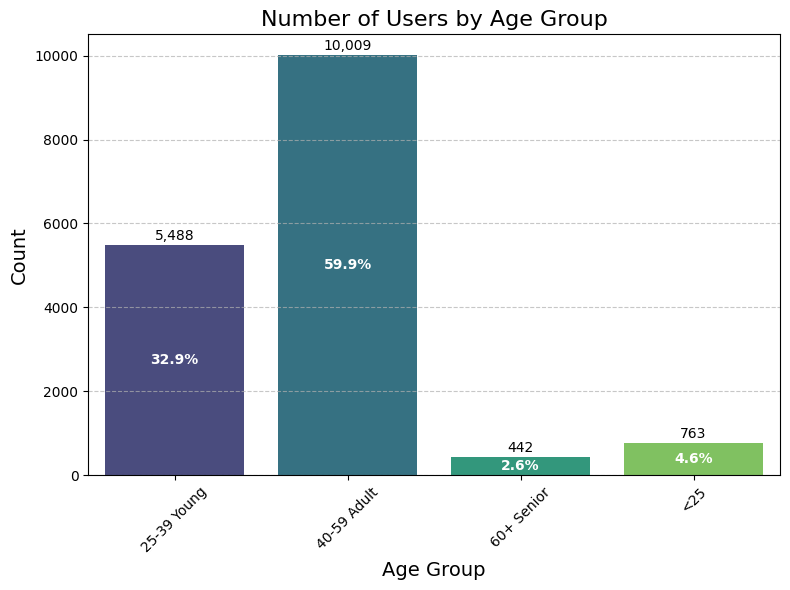

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the number of users in each age group
age_group_counts = new_data['age_group'].value_counts().reset_index()
age_group_counts.columns = ['age_group', 'count']

# Sort the age groups for better visualization (ensure sorting works as expected)
age_group_counts = age_group_counts.sort_values('age_group')

# Create the barplot
plt.figure(figsize=(8, 6))
bars = sns.barplot(data=age_group_counts, x='age_group', y='count', palette='viridis')

# Add percentages as labels inside the bars
total_count = age_group_counts['count'].sum()
for bar, count in zip(bars.patches, age_group_counts['count']):
    percentage = (count / total_count) * 100
    # Add percentage inside the bar
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,  # Position in the middle of the bar
             f'{percentage:.1f}%',  # Format as percentage
             ha='center',
             va='center',
             fontsize=10,
             color='white',  # White text for better contrast
             weight='bold')
    # Add total count above the bar
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 50,  # Position slightly above the bar
             f'{count:,.0f}',  # Format with a thousands separator
             ha='center',
             va='bottom',
             fontsize=10,
             color='black')

# Add labels, title, and grid
plt.title('Number of Users by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better appearance
plt.tight_layout()

# Show the plot
plt.show()

### Cross tab by Age Groups and Gender

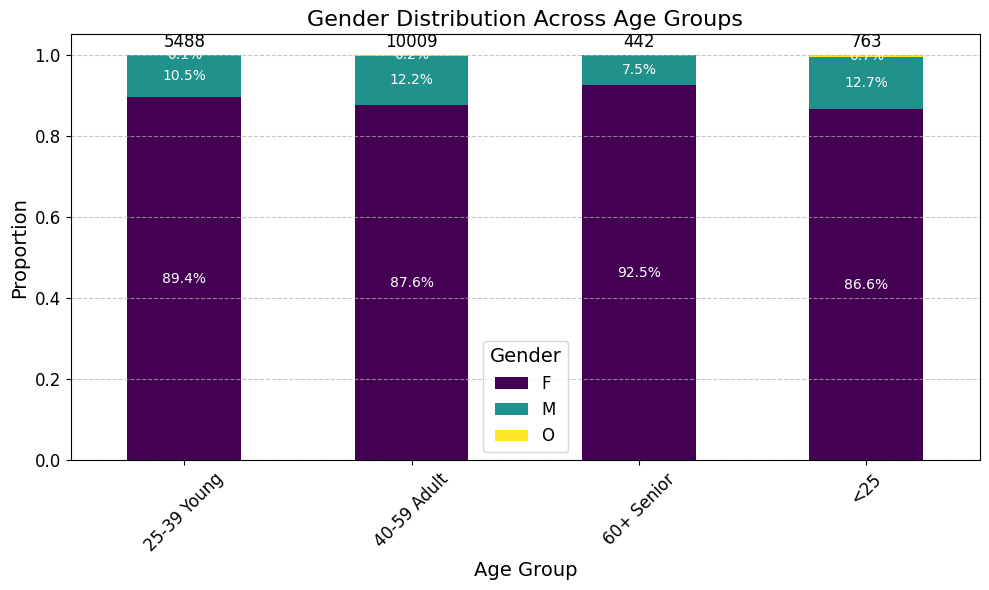

In [ ]:
# Create a stacked bar chart
# Generate the normalized cross-tab for proportions
proportions = pd.crosstab(index=new_data['age_group'],
                          columns=new_data['gender'],
                          normalize='index')

# Generate the actual counts for labeling
counts = pd.crosstab(index=new_data['age_group'],
                     columns=new_data['gender']).sum(axis=1)

# Create the plot
ax = proportions.plot(kind='bar',
                      stacked=True,
                      figsize=(10, 6),
                      colormap='viridis')

# Customize the chart
plt.title('Gender Distribution Across Age Groups', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Proportion', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Gender', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add total user counts as labels above each bar
for i, total in enumerate(counts):
    plt.text(i, 1.02,  # Position above the bar
             f'{total}',  # Total count text
             ha='center', fontsize=12, color='black')

# Add percentages inside each bar
for bar_group in ax.containers:
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:  # Avoid labels for zero values
            ax.text(bar.get_x() + bar.get_width() / 2,
                    bar.get_y() + height / 2,  # Center of the bar
                    f'{height:.1%}',  # Format as percentage
                    ha='center', va='center', fontsize=10, color='white')

# Show the plot
plt.tight_layout()
plt.show()

### Distribution of groups traveleres based on number of flights

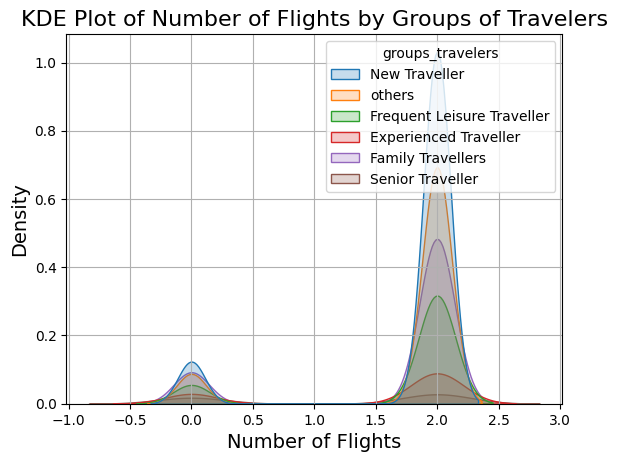

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the KDE plot with the desired configurations
sns.kdeplot(data=new_data, x='num_flights', hue='groups_travelers', fill=True)

# Add gridlines for better visualization
plt.grid(True)

# Set the plot title and labels for better clarity
plt.title('KDE Plot of Number of Flights by Groups of Travelers', fontsize=16)
plt.xlabel('Number of Flights', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the plot
plt.show()

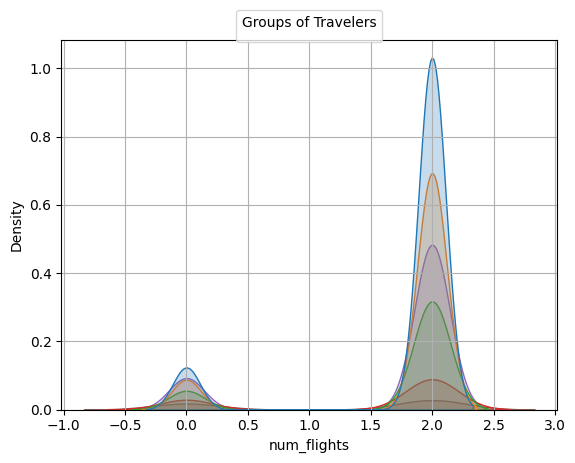

In [ ]:
sns.kdeplot(data = new_data, x = 'num_flights',
            hue = 'groups_travelers', fill=True)

#Add the grid
plt.grid()

# Center the legend at the top
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2, title="Groups of Travelers")

# Show the plot
plt.show()

### Calculate the percentage of each group

<ipython-input-229-266f6ff4b5f6>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




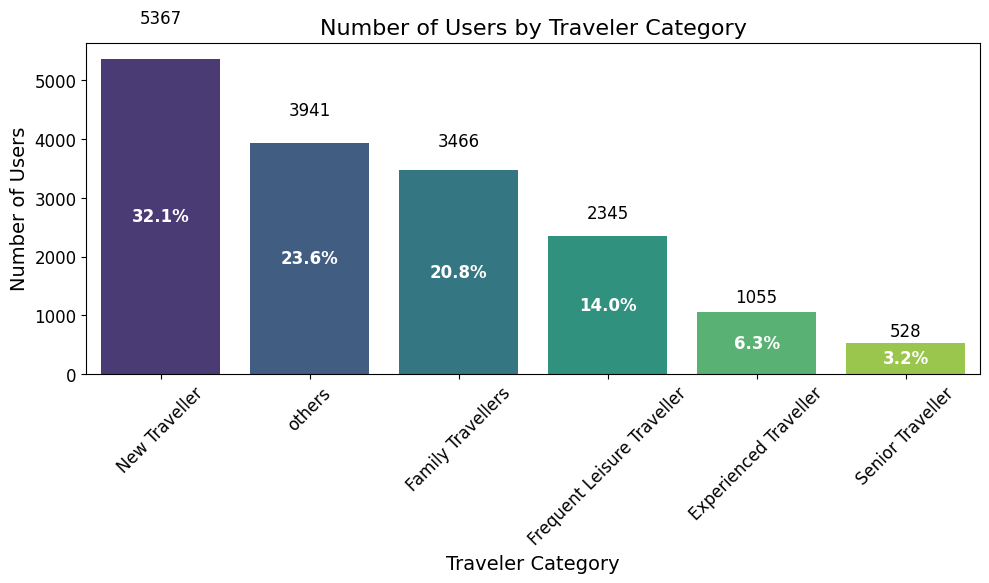

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by traveler_category and count user_id
category_counts = new_data.groupby('groups_travelers', as_index=False).agg({'user_id': 'count'})
category_counts.rename(columns={'user_id': 'user_count'}, inplace=True)

# Sort data by number of users (optional)
category_counts = category_counts.sort_values(by='user_count', ascending=False)

# Calculate the percentage for each category
total_users = category_counts['user_count'].sum()
category_counts['percentage'] = (category_counts['user_count'] / total_users) * 100

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = sns.barplot(
    x='groups_travelers',
    y='user_count',
    data=category_counts,
    palette='viridis'
)

# Customize the chart
plt.title('Number of Users by Traveler Category', fontsize=16)
plt.xlabel('Traveler Category', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add percentages inside the bars and total count above the bars
for bar in bars.patches:
    # Get the height of each bar (user count)
    height = bar.get_height()

    # Calculate the percentage and format it
    percentage = (height / total_users) * 100

    # Add percentage inside the bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
        height / 2,  # Y position (middle of the bar)
        f'{percentage:.1f}%',  # Text (percentage with one decimal place)
        ha='center',  # Horizontal alignment (centered)
        va='center',  # Vertical alignment (centered)
        fontsize=12,
        color='white',  # White text for better contrast
        weight='bold'
    )

    # Add total count above the bar
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
        height + 0.1 * height,  # Y position (slightly above the bar)
        f'{height:.0f}',  # Text (total count without decimals)
        ha='center',  # Horizontal alignment (centered)
        va='bottom',  # Vertical alignment (bottom of the text)
        fontsize=12,
        color='black'  # Black text for total count
    )

# Show the graph
plt.tight_layout()
plt.show()

###Feature Engineering for Clustering

I’ve developed a set of supplementary features intended for use in the clustering analysis. These features represent various aspects of customer behavior, specifically tailored to align with five predefined perks. It's important to clarify that not all of these features will be utilized in the final analysis. Rather, they offer a foundation for identifying which ones are most significant in relation to the perks:

* **One Night Free Hotel With Flight**
* **Free Hotel Meal**
* **Free Cancellation**
* **Free Checked Bag**
* **Exclusive Discounts**

Each feature highlights a particular behavior or preference of customers linked to these perks, providing a basis for evaluating their relevance during the clustering process..

The insights gained will enable us to tailor our marketing strategies and perk assignments more effectively to cater to the unique needs and desires of each cluster.

In [ ]:
#Check for missing values
missing_values = new_data.isnull().sum()
print(missing_values)

user_id                           0
trip_id                           0
session_start                     0
session_end                       0
page_clicks                       0
flight_discount                   0
flight_discount_amount            0
hotel_discount                    0
hotel_discount_amount             0
flight_booked                     0
home_airport_lat                  0
home_airport_lon                  0
hotel_booked                      0
cancellation                      0
session_duration                  0
gender                            0
married                           0
has_children                      0
seats                             0
departure_time                    0
return_time                       0
checked_bags                      0
destination_airport_lat           0
destination_airport_lon           0
nights                            0
rooms                             0
hotel_price_per_room_night_usd    0
age                         

### Flight/Hotel Related Features:

In [ ]:
# Calculate the percentage of flight bookings under discount
new_data['percentage_flight_discount'] = new_data['total_flights_booked'] / new_data['num_sessions']

# Calculate the 'average_dollars_saved'
new_data['avg_usd_saved'] = (new_data['total_flight_discount'] + new_data['total_hotel_discount']) / 2

# Calculate the Flight-Hotel Combination Percentage
new_data['flight_hotel_combination'] = ((new_data['total_flights_booked'] > 0) & (new_data['total_hotels_booked'] > 0)) * 100

# Calculate the Hotel Booking Frequency
new_data['hotel_booking_frequency'] = new_data['total_hotels_booked'] / new_data['num_sessions']

# Calculate the Hotel-Only Bookings
new_data['hotel_only_sessions_percentage'] = (new_data['total_hotels_booked'] / new_data['num_sessions']) * 100

In [ ]:
new_data.shape

(16702, 58)

### Distance/Time Related Features:

In [ ]:
# Calculate the Haversine Distance
new_data['haversine_distance'] = new_data.apply(lambda row: haversine_distance(row['home_airport_lat'], row['home_airport_lon'], row['destination_airport_lat'], row['destination_airport_lon']), axis=1)

# Scale the Haversine Distance
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
new_data['scaled_haversine_distance'] = scaler.fit_transform(new_data[['haversine_distance']])


# Creating a 'Short Trip' Feature:

# Calculate Distance Traveled
def calculate_distance_traveled(row):
    return row['total_flights_booked'] * haversine_distance(
        row['home_airport_lat'], row['home_airport_lon'], row['destination_airport_lat'], row['destination_airport_lon']
    )

new_data['distance_traveled'] = new_data.apply(calculate_distance_traveled, axis=1)

# Ensure datetime conversion
new_data['departure_time'] = pd.to_datetime(new_data['departure_time'], errors='coerce')
new_data['return_time'] = pd.to_datetime(new_data['return_time'], errors='coerce')

# Calculate trip duration
new_data['trip_duration'] = new_data['return_time'] - new_data['departure_time']

# Define a threshold for short trips (e.g., trips of 3 days or less)
short_trip_threshold = timedelta(days=3)

# Create a short trip indicator (1 if trip duration <= threshold, otherwise 0)
new_data['short_trip'] = (new_data['trip_duration'] <= short_trip_threshold).astype(int)

# Optionally drop the temporary trip_duration column
new_data.drop(columns=['trip_duration'], inplace=True)

In [ ]:
# Define the threshold for last-minute bookings
last_minute_threshold = timedelta(days=7)

# Create a last-minute booking indicator
new_data['last_minute_booking'] = (
    (pd.to_datetime(new_data['departure_time']) - pd.to_datetime(new_data['session_start']))
    <= last_minute_threshold
).astype(int)


# Calculate the Percentage of 'Short Trips':

# Average Trip Duration
new_data['trip_duration'] = pd.to_datetime(new_data['return_time']) - pd.to_datetime(new_data['departure_time'])
new_data['trip_duration_days'] = new_data['trip_duration'].dt.days

# Percentage of Short Trips
short_trip_threshold = 3  # (weekend)
new_data['short_trip_percentage'] = (new_data['trip_duration_days'] <= short_trip_threshold).astype(int) * 100

# Drop intermediate columns
new_data.drop(columns=['trip_duration', 'trip_duration_days'], inplace=True)



In [ ]:
# Calculate the Number of Nights Stayed in Hotels
new_data['number_of_nights_stayed'] = (pd.to_datetime(new_data['return_time']) - pd.to_datetime(new_data['departure_time'])).dt.days


# Calculate Average Nights per Booking
new_data['departure_time'] = pd.to_datetime(new_data['departure_time'])
new_data['return_time'] = pd.to_datetime(new_data['return_time'])
new_data['trip_duration_days'] = (new_data['return_time'] - new_data['departure_time']).dt.days
new_data['average_nights_per_booking'] = new_data['trip_duration_days'] / new_data['total_hotels_booked']

# Fill missing values with 0
new_data['average_nights_per_booking'] = new_data['average_nights_per_booking'].fillna(0)

# Replace infinite values with a large finite number
max_trip_duration = new_data['trip_duration_days'].max()  # Find the maximum trip duration in days
new_data['average_nights_per_booking'].replace([np.inf, -np.inf], max_trip_duration, inplace=True)




<ipython-input-235-38db404af8d6>:16: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
new_data.shape

(16702, 66)

### Cancellation Related Features:

In [ ]:
# Cancellation Rate
new_data['cancellation_rate'] = new_data['total_cancellations'] / new_data['num_sessions']

# Create a binary feature indicating if the customer has ever canceled
new_data['ever_canceled'] = (new_data['total_cancellations'] > 0).astype(int)

# Calculate the proportion of cancellations using total flights, total hotels, and total cancellations
new_data['proportion_of_cancellations'] = new_data['total_cancellations'] / (new_data['total_flights_booked'] + new_data['total_hotels_booked'])

# Calculate Cancellation Percentage
new_data['cancellation_percentage'] = (new_data['total_cancellations'] / (new_data['total_flights_booked'] + new_data['total_hotels_booked'])) * 100

# Fill missing values with 0
new_data['cancellation_percentage'] = new_data['cancellation_percentage'].fillna(0)

### Engagement Related Features:

In [ ]:
# Engagement Score
new_data['engagement_score'] = new_data['num_clicks'] + new_data['total_flights_booked'] + new_data['total_hotels_booked']

# Browsing Only Engagement
new_data['browsing_only_engagement'] = new_data['engagement_score'] - new_data['total_flights_booked']

### Baggage Related Features:

In [ ]:
# Calculate Checked bags per Flights Booked
new_data['baggage_with_flight'] = (new_data['total_checked_bags'] > 0).astype(int) * (new_data['total_flights_booked'] > 0).astype(int)

# Checked Bag Percentage
new_data['checked_bag_percentage'] = (new_data['total_checked_bags'] / new_data['total_flights_booked']) * 100
new_data['checked_bag_percentage'] = new_data['checked_bag_percentage'].fillna(0)  # Handle division by zero

### Value Related Features:

In [ ]:
# Average Dollars Saved on Hotels
new_data['avg_usd_saved_hotels'] = new_data['total_hotel_discount'] / new_data['total_hotels_booked']

# Discount Utilisation Rate
new_data['discount_utilisation_rate'] = new_data['avg_usd_saved'] / (new_data['total_flight_discount'] + new_data['total_hotel_discount'])
new_data['discount_utilisation_rate'] = new_data['discount_utilisation_rate'].fillna(0)  # Handle division by zero

# Calculate Discount Utilisation Frequency
new_data['discount_utilisation_frequency'] = (new_data['total_flight_discount'] + new_data['total_hotel_discount']) / new_data['num_sessions']

# Calculate the scaled average dollars saved amount with haversine distance
epsilon = 1e-10
new_data['avg_usd_saved_per_distance'] = new_data['avg_usd_saved'] / (new_data['haversine_distance'] + epsilon)

In [ ]:
new_data.shape

(16702, 78)

### Check my new features for missing Values

After adding new features through calculations (based on the perks given by Helena) , it's essential to check whether any missing, infinite, or boolean values have been generated. If such values are found, the next step will be to address them appropriately.

To start, I'll review the data types of all the relevant columns.

In [ ]:
# Define a list of feature columns to inspect
feature_columns = ['num_clicks', 'total_flight_discount', 'total_hotel_discount',
                    'total_flights_booked', 'total_hotels_booked', 'total_checked_bags', 'baggage_with_flight',
                    'rooms', 'seats', 'num_sessions', 'total_cancellations','cancellation_rate', 'percentage_flight_discount', 'avg_usd_saved',
                   'engagement_score', 'flight_hotel_combination', 'hotel_booking_frequency',
                   'avg_usd_saved_hotels', 'hotel_only_sessions_percentage', 'browsing_only_engagement', 'last_minute_booking', 'short_trip', 'ever_canceled',
                   'proportion_of_cancellations', 'checked_bag_percentage',
                   'short_trip_percentage', 'number_of_nights_stayed', 'discount_utilisation_rate', 'average_nights_per_booking', 'discount_utilisation_frequency', 'cancellation_percentage', 'avg_usd_saved_per_distance']

# Get the data types of the specified feature columns in the DataFrame
column_data_types = new_data[feature_columns].dtypes

# Print the data types of the feature columns
print("Data types of feature_columns:")
print(column_data_types)

Data types of feature_columns:
num_clicks                          int64
total_flight_discount               int64
total_hotel_discount                int64
total_flights_booked                int64
total_hotels_booked                 int64
total_checked_bags                float64
baggage_with_flight                 int64
rooms                             float64
seats                             float64
num_sessions                        int64
total_cancellations                 int64
cancellation_rate                 float64
percentage_flight_discount        float64
avg_usd_saved                     float64
engagement_score                    int64
flight_hotel_combination            int64
hotel_booking_frequency           float64
avg_usd_saved_hotels              float64
hotel_only_sessions_percentage    float64
browsing_only_engagement            int64
last_minute_booking                 int64
short_trip                          int64
ever_canceled                       int64
pro

From this I can see that all values are numerical and as such are compatible for analysis.
Next I am checking for missing and infinite values:

In [ ]:
# Check for missing values

missing_values_summary = new_data[feature_columns].isnull().sum()

# Fill missing values with 0
new_data[feature_columns] = new_data[feature_columns].fillna(0)

# Check for infinite values
infinite_values_summary = np.isinf(new_data[feature_columns]).sum()

# Replace infinite values with 0
new_data[feature_columns] = new_data[feature_columns].replace([np.inf, -np.inf], 0)

missing_values_summary
infinite_values_summary



num_clicks                        0
total_flight_discount             0
total_hotel_discount              0
total_flights_booked              0
total_hotels_booked               0
total_checked_bags                0
baggage_with_flight               0
rooms                             0
seats                             0
num_sessions                      0
total_cancellations               0
cancellation_rate                 0
percentage_flight_discount        0
avg_usd_saved                     0
engagement_score                  0
flight_hotel_combination          0
hotel_booking_frequency           0
avg_usd_saved_hotels              0
hotel_only_sessions_percentage    0
browsing_only_engagement          0
last_minute_booking               0
short_trip                        0
ever_canceled                     0
proportion_of_cancellations       0
checked_bag_percentage            0
short_trip_percentage             0
number_of_nights_stayed           0
discount_utilisation_rate         0
average_nights_per_booking        0
discount_utilisation_frequency    0
cancellation_percentage           0
avg_usd_saved_per_distance        0
dtype: int64

### Scaling the Data for a further analysis

In the code below, I applied the StandardScaler to normalize a specific set of columns. These columns include features and numerical values that may be used for clustering. The StandardScaler was chosen because it is particularly effective for standardizing data.

The purpose of this process is to bring all features to a common scale by transforming them to have a mean of 0 and a standard deviation of 1. This normalization ensures that all features are comparable and prevents any single feature from disproportionately influencing the analysis. This step lays a consistent and reliable groundwork for further data exploration and modeling.

In [ ]:
# Create a StandardScaler
scaler = StandardScaler()

# Columns to Scale
columns_to_scale = ['num_clicks', 'total_flight_discount', 'total_hotel_discount',
                    'total_flights_booked', 'total_hotels_booked', 'total_checked_bags', 'baggage_with_flight',
                    'rooms', 'seats', 'num_sessions', 'total_cancellations','cancellation_rate', 'percentage_flight_discount', 'avg_usd_saved',
                   'engagement_score', 'flight_hotel_combination', 'hotel_booking_frequency',
                   'avg_usd_saved_hotels', 'hotel_only_sessions_percentage', 'browsing_only_engagement', 'last_minute_booking', 'short_trip', 'ever_canceled',
                   'proportion_of_cancellations', 'checked_bag_percentage',
                   'short_trip_percentage', 'number_of_nights_stayed', 'discount_utilisation_rate', 'average_nights_per_booking', 'discount_utilisation_frequency', 'cancellation_percentage', 'avg_usd_saved_per_distance']

# Scale Using StandardScaler
new_data[columns_to_scale] = scaler.fit_transform(new_data[columns_to_scale])

# Print Columns 'Before Scaling' and 'After Scaling'
print("Before scaling:")
print(new_data[columns_to_scale].min())
print("After scaling:")
print(new_data[columns_to_scale].max())


Before scaling:
num_clicks                        -1.223688
total_flight_discount             -0.860975
total_hotel_discount              -0.816613
total_flights_booked              -2.186751
total_hotels_booked               -2.366453
total_checked_bags                -1.225915
baggage_with_flight               -2.152011
rooms                             -1.734593
seats                             -1.503331
num_sessions                      -1.916925
total_cancellations               -0.398926
cancellation_rate                 -0.375540
percentage_flight_discount        -3.801767
avg_usd_saved                     -1.045104
engagement_score                  -1.264741
flight_hotel_combination          -5.486567
hotel_booking_frequency           -5.035175
avg_usd_saved_hotels              -0.723996
hotel_only_sessions_percentage    -5.035175
browsing_only_engagement          -1.251242
last_minute_booking               -1.054659
short_trip                        -1.219536
ever_canceled   

## Analysing correlations between features:

After handling missing and infinite values in the newly created features, the next step is to analyze the correlations between all features. This step is crucial for identifying which features are most suitable for inclusion in the K-Means clustering process.

The goal is to strike a balance when selecting features for clustering. Highly correlated features can pose challenges, such as diminishing their individual value, complicating the interpretation of feature importance, and potentially reducing the model's reliability. Therefore, it’s important to avoid including features that are excessively correlated while ensuring that the chosen features capture meaningful customer behavior relevant to the analysis.

At this stage, I’ve excluded the **'avg_km_flown'** feature because, based on the scaling results, it consists entirely of zeros and does not contribute any meaningful variance to the dataset.

To better understand the relationships between features, I am generating a correlation heatmap. While the heatmap might initially seem dense and complex, the focus is on identifying features that meet the criteria for inclusion or exclusion. This preliminary analysis helps highlight features that are strong candidates for clustering without requiring a deep dive into every correlation. The heatmap serves as a foundation for refining feature selection and proceeding with the clustering analysis effectively.

### Calculate the correlation

"Correlation (specifically the Pearson correlation) is a measure of linear association between variables that takes values between -1 and 1. Given variables X and Y, A correlation greater than 0 between them tells us that larger values of X generally predict larger values of Y, and vice versa."

Saber si hay relacion/dependencia entre dos variables, X y Y

$Y = mx + b$

In [ ]:
new_data.keys()

Index(['user_id', 'trip_id', 'session_start', 'session_end', 'page_clicks',
       'flight_discount', 'flight_discount_amount', 'hotel_discount',
       'hotel_discount_amount', 'flight_booked', 'home_airport_lat',
       'home_airport_lon', 'hotel_booked', 'cancellation', 'session_duration',
       'gender', 'married', 'has_children', 'seats', 'departure_time',
       'return_time', 'checked_bags', 'destination_airport_lat',
       'destination_airport_lon', 'nights', 'rooms',
       'hotel_price_per_room_night_usd', 'age', 'session_duration_min',
       'time_spent', 'num_flights', 'money_spent_hotel', 'total_flight_spend',
       'time_before_trip', 'total_cost_hotel', 'discount_hotel_proportion',
       'total_cost_flights', 'discount_flight_proportion',
       'haversine_distance', 'great_circle_distance', 'avg_km_flown',
       'num_clicks', 'num_sessions', 'avg_sessions_duration', 'num_of_trips',
       'total_flight_discount', 'total_hotel_discount', 'total_flights_booked',
   

## Note:
When performing K-Means clustering, there is no strict rule for the number of features to correlate, but several guidelines can help optimize your feature selection:

1. Avoid High Correlation Between Features:
Highly correlated features (with a correlation coefficient above 0.8 or 0.9) should be avoided in K-Means. This is because K-Means uses Euclidean distance to calculate the distance between points, and highly correlated features can distort the clustering process, making the model inefficient.
To address this, you can remove one of the features in a pair of highly correlated features (often referred to as multicollinearity).

Based on that I start to remove the features highly correlated:

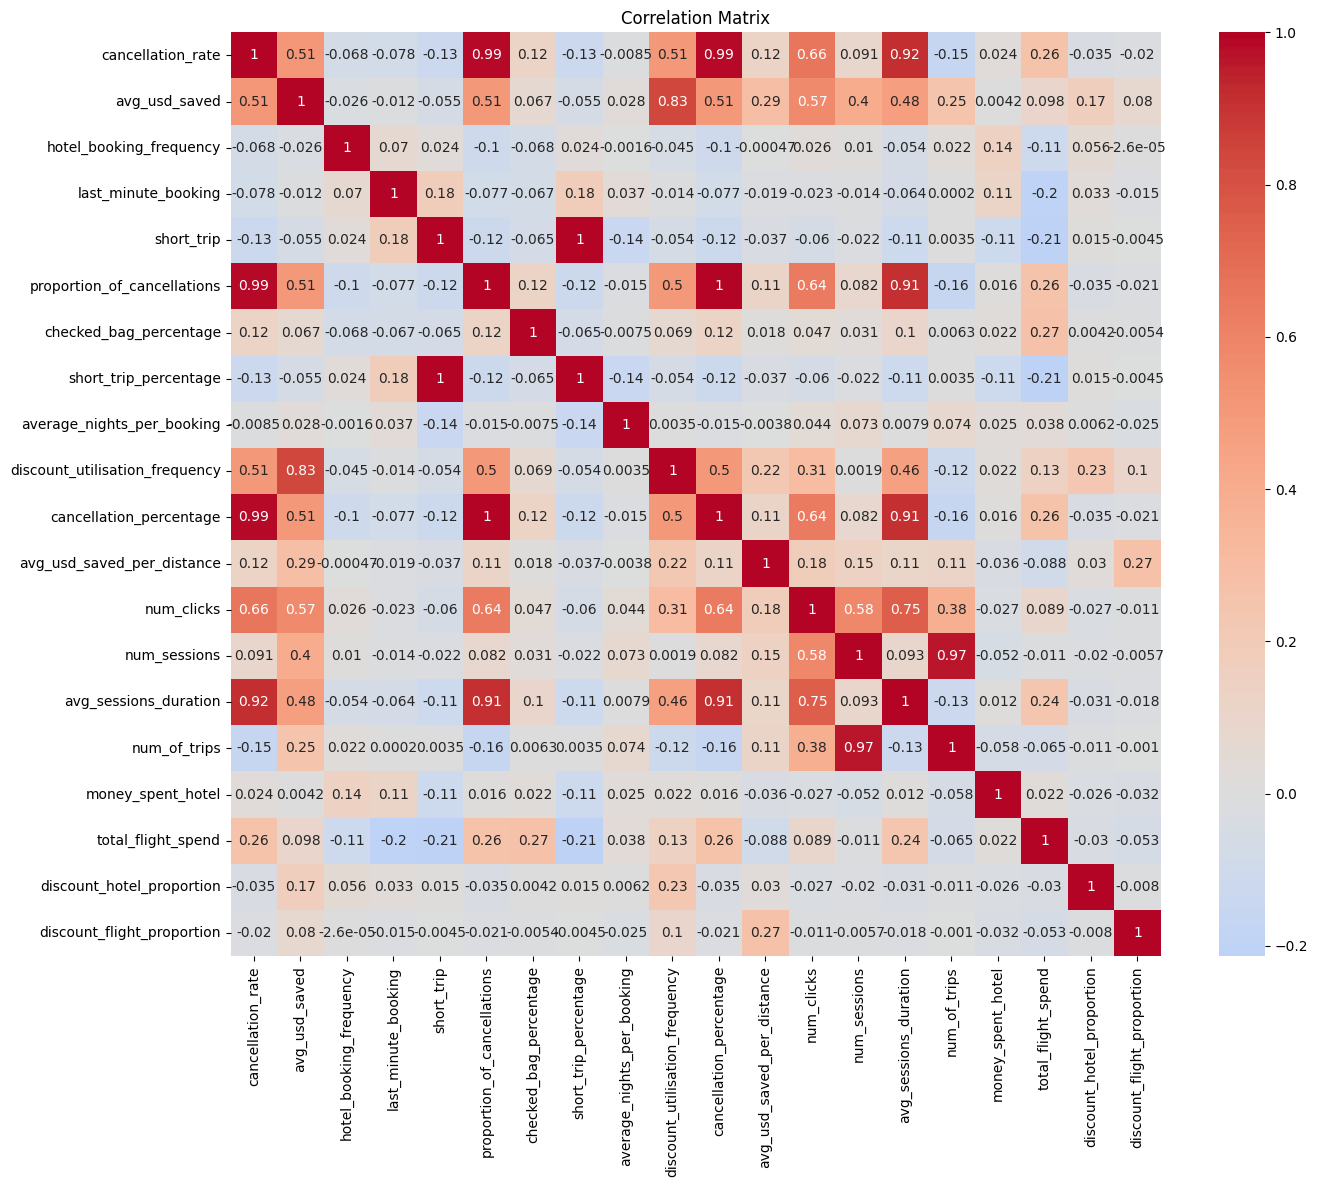

Features: proportion_of_cancellations and cancellation_rate - Correlation: 0.99
Features: short_trip_percentage and short_trip - Correlation: 1.00
Features: discount_utilisation_frequency and avg_usd_saved - Correlation: 0.83
Features: cancellation_percentage and cancellation_rate - Correlation: 0.99
Features: cancellation_percentage and proportion_of_cancellations - Correlation: 1.00
Features: avg_sessions_duration and cancellation_rate - Correlation: 0.92
Features: avg_sessions_duration and proportion_of_cancellations - Correlation: 0.91
Features: avg_sessions_duration and cancellation_percentage - Correlation: 0.91
Features: num_of_trips and num_sessions - Correlation: 0.97


In [ ]:
# Features to measure
all_features = ['cancellation_rate', 'avg_usd_saved',
                'hotel_booking_frequency',
                'last_minute_booking',
                'short_trip', 'proportion_of_cancellations', 'checked_bag_percentage',
                'short_trip_percentage', 'average_nights_per_booking',
                'discount_utilisation_frequency', 'cancellation_percentage',
                'avg_usd_saved_per_distance', 'num_clicks', 'num_sessions', 'avg_sessions_duration',
                'num_of_trips', 'money_spent_hotel', 'total_flight_spend',
                'discount_hotel_proportion', 'discount_flight_proportion']

# Calculate correlations between specified metrics
correlation_matrix = new_data[all_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, annot_kws={'fontsize': 10})
plt.title("Correlation Matrix")
plt.show()

# Set a threshold for high correlation
threshold = 0.8

# Find pairs of features with correlation greater than the threshold
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display the highly correlated feature pairs
for pair in highly_correlated_pairs:
    print(f"Features: {pair[0]} and {pair[1]} - Correlation: {pair[2]:.2f}")

In [ ]:
new_data.shape

(16702, 78)

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16702 entries, 0 to 16701
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   user_id                         16702 non-null  int64         
 1   trip_id                         16702 non-null  object        
 2   session_start                   16702 non-null  datetime64[ns]
 3   session_end                     16702 non-null  object        
 4   page_clicks                     16702 non-null  int64         
 5   flight_discount                 16702 non-null  bool          
 6   flight_discount_amount          16702 non-null  float64       
 7   hotel_discount                  16702 non-null  bool          
 8   hotel_discount_amount           16702 non-null  float64       
 9   flight_booked                   16702 non-null  bool          
 10  home_airport_lat                16702 non-null  float64       
 11  ho

## Analysing correlations between features Part II:
After removing the highly features and dont needed for our analysis I plot again my heatmap correlation features.

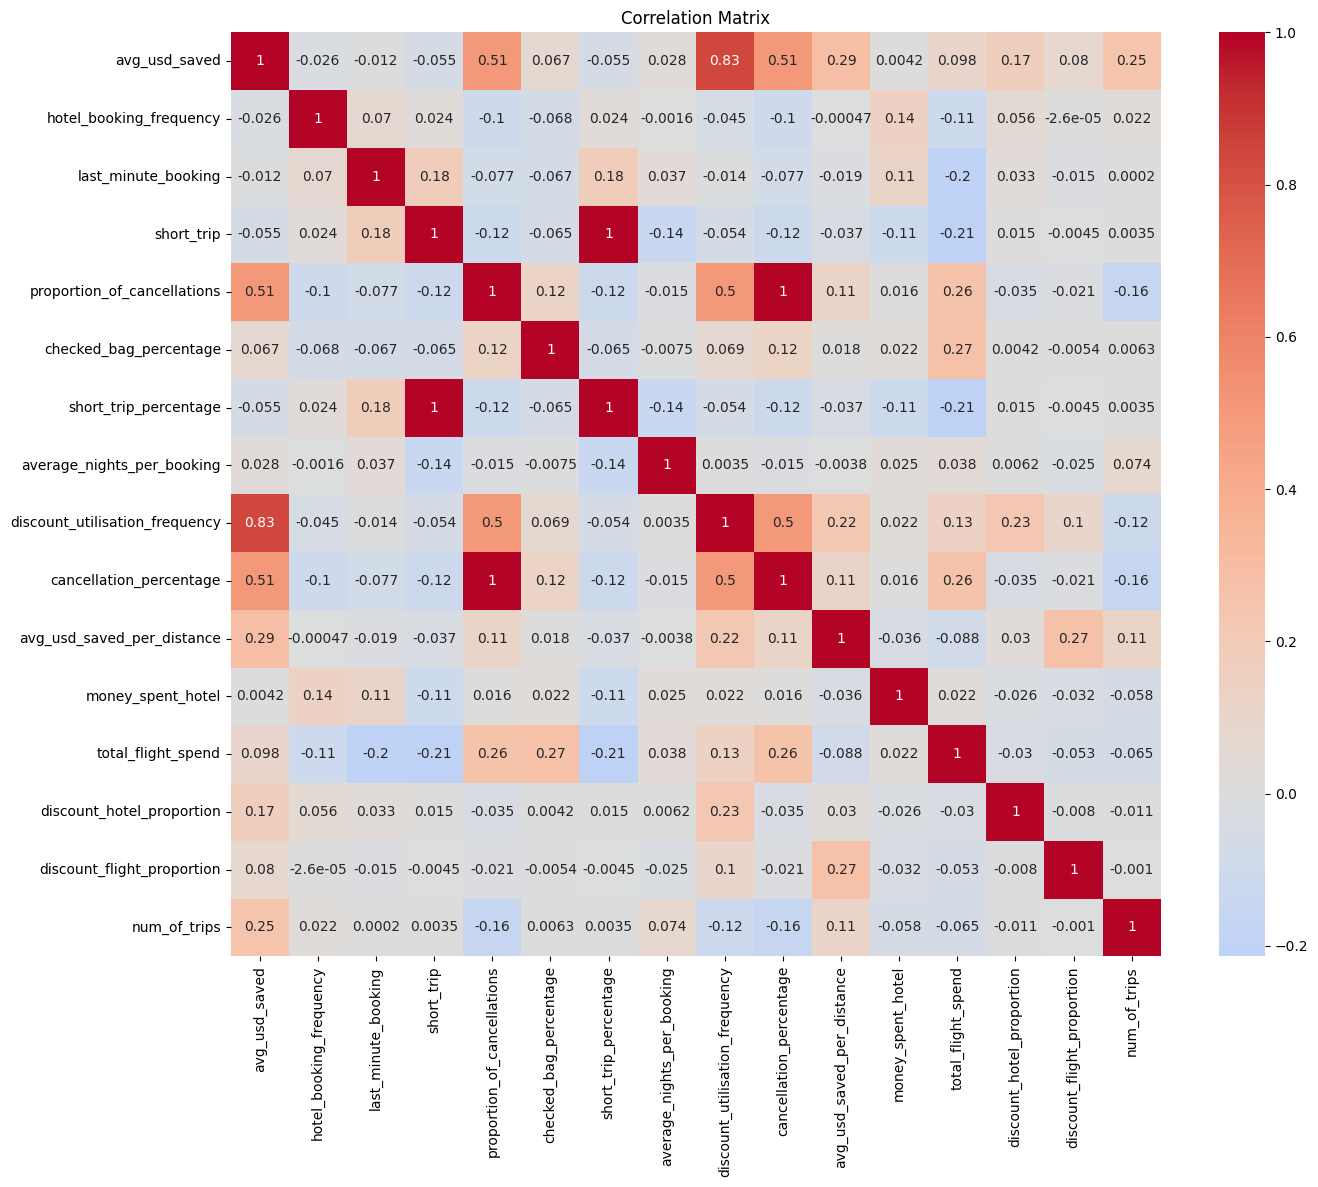

In [ ]:
# Features to measure
all_features = ['avg_usd_saved',
                'hotel_booking_frequency',
                'last_minute_booking',
                'short_trip',
                'proportion_of_cancellations',
                'checked_bag_percentage',
                'short_trip_percentage',
                'average_nights_per_booking',
                'discount_utilisation_frequency',
                'cancellation_percentage',
                'avg_usd_saved_per_distance',
                'money_spent_hotel',
                'total_flight_spend',
                'discount_hotel_proportion',
                'discount_flight_proportion',
                'num_of_trips',
                ]

# Calculate correlations between specified metrics
correlation_matrix = new_data[all_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, annot_kws={'fontsize': 10})
plt.title("Correlation Matrix")
plt.show()

### Overview of the Data:

A statistical summary about my data.

In [ ]:
num_cols = ['avg_usd_saved',
                'hotel_booking_frequency',
                'last_minute_booking',
                'short_trip',
                'proportion_of_cancellations',
                'checked_bag_percentage',
                'short_trip_percentage',
                'average_nights_per_booking',
                'discount_utilisation_frequency',
                'cancellation_percentage',
                'avg_usd_saved_per_distance',
                'money_spent_hotel',
                'total_flight_spend',
                'discount_hotel_proportion',
                'discount_flight_proportion',
                'num_of_trips',
                ]

In [ ]:
# Define the numerical columns to include in the summary
stats_columns = ['avg_usd_saved',
                'hotel_booking_frequency',
                'last_minute_booking',
                'short_trip',
                'proportion_of_cancellations',
                'checked_bag_percentage',
                'short_trip_percentage',
                'average_nights_per_booking',
                'discount_utilisation_frequency',
                'cancellation_percentage',
                'avg_usd_saved_per_distance',
                'money_spent_hotel',
                'total_flight_spend',
                'discount_hotel_proportion',
                'discount_flight_proportion'
                ]

# Generate the statistical summary for numerical columns
summary = new_data[num_cols].describe().T

# Display the summary
display(summary)

count          mean          std        min  \
avg_usd_saved                   16702.0  6.126102e-17     1.000030  -1.045104   
hotel_booking_frequency         16702.0  5.870848e-17     1.000030  -5.035175   
last_minute_booking             16702.0 -7.827797e-17     1.000030  -1.054659   
short_trip                      16702.0 -1.293288e-16     1.000030  -1.219536   
proportion_of_cancellations     16702.0  1.361356e-17     1.000030  -0.369636   
checked_bag_percentage          16702.0  4.254237e-17     1.000030  -1.244765   
short_trip_percentage           16702.0  3.573559e-17     1.000030  -1.219536   
average_nights_per_booking      16702.0 -2.765254e-17     1.000030 -12.542914   
discount_utilisation_frequency  16702.0 -6.126102e-17     1.000030  -1.043819   
cancellation_percentage         16702.0  9.529492e-17     1.000030  -0.369636   
avg_usd_saved_per_distance      16702.0 -9.359322e-18     1.000030  -0.309507   
money_spent_hotel               16702.0  6.913366e+02  1189.291236   0.000000   
total_flight_spend              16702.0  4.409122e+02   767.759314   0.000000   
discount_hotel_proportion       16702.0  1.010540e-04     0.000388   0.000000   
discount_flight_proportion      16702.0  8.616567e-05     0.000599   0.000000   
num_of_trips                    16702.0  3.525266e+00     1.355207   1.000000   

                                       25%         50%         75%  \
avg_usd_saved                    -1.045104   -0.232851    0.579403   
hotel_booking_frequency          -0.525624    0.601764    0.601764   
last_minute_booking              -1.054659    0.948174    0.948174   
short_trip                       -1.219536    0.819984    0.819984   
proportion_of_cancellations      -0.369636   -0.369636   -0.369636   
checked_bag_percentage           -0.526052   -0.166696    0.480146   
short_trip_percentage            -1.219536    0.819984    0.819984   
average_nights_per_booking        0.168331    0.168715    0.169142   
discount_utilisation_frequency   -1.043819   -0.050606    0.446000   
cancellation_percentage          -0.369636   -0.369636   -0.369636   
avg_usd_saved_per_distance       -0.309507   -0.205392   -0.014348   
money_spent_hotel               105.000000  326.000000  792.000000   
total_flight_spend              104.387500  311.965000  541.329875   
discount_hotel_proportion         0.000000    0.000000    0.000000   
discount_flight_proportion        0.000000    0.000000    0.000000   
num_of_trips                      3.000000    3.000000    4.000000   

                                         max  
avg_usd_saved                       3.828418  
hotel_booking_frequency             0.601764  
last_minute_booking                 0.948174  
short_trip                          0.819984  
proportion_of_cancellations         8.446701  
checked_bag_percentage             10.973352  
short_trip_percentage               0.819984  
average_nights_per_booking          0.190502  
discount_utilisation_frequency      4.915456  
cancellation_percentage             8.446701  
avg_usd_saved_per_distance         53.201322  
money_spent_hotel               27702.000000  
total_flight_spend              21548.040000  
discount_hotel_proportion           0.007407  
discount_flight_proportion          0.026288  
num_of_trips                        8.000000

### Plotting the Elbow Curve

The Elbow curve analysis serves as a valuable tool to determine the optimal number of clusters for a given dataset

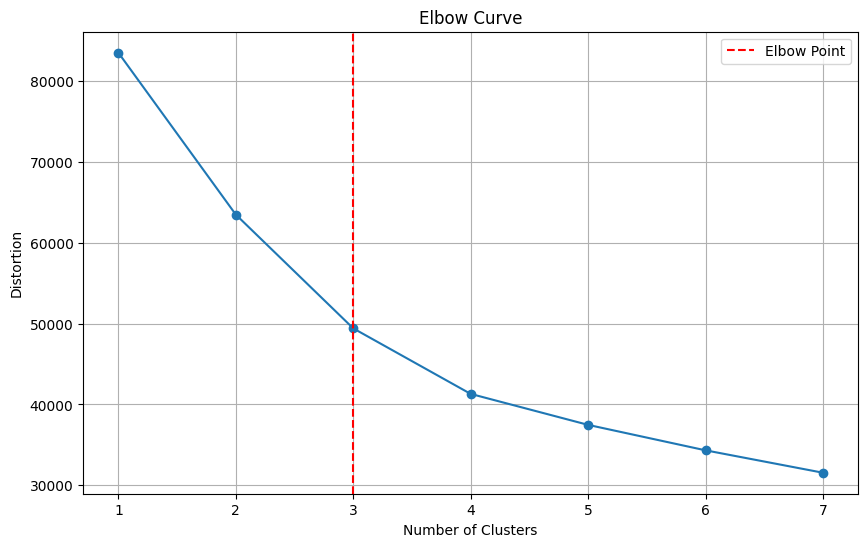

The silhouette score using 3 number of clusters is: 0.319
The silhouette score using 4 number of clusters is: 0.330
The silhouette score using 5 number of clusters is: 0.293
The silhouette score using 6 number of clusters is: 0.293


In [ ]:
# Select columns for clustering
cluster_columns = ['proportion_of_cancellations', 'checked_bag_percentage',
                   'short_trip_percentage', 'hotel_booking_frequency', 'avg_usd_saved']

# Extract the data for clustering
cluster_data = new_data[cluster_columns]

#Plot Elbow Curve
def plot_elbow_curve(model, data, cluster_ranges):
    distortions = []
    for num_clusters in cluster_ranges:
        model.n_clusters = num_clusters
        model.fit(data)
        distortions.append(model.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(cluster_ranges, distortions, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion')
    plt.title('Elbow Curve')

    # Add a reference line to help identify the elbow point
    plt.axvline(x=3, color='red', linestyle='--', label='Elbow Point')

    plt.legend()
    plt.grid()
    plt.show()


# fitting KMeans and finding appropriate amount of clusters
model = KMeans(n_clusters=5, random_state=0, n_init=10)
model.fit(cluster_data)

plot_elbow_curve(model, cluster_data, cluster_ranges=range(1, 8))
plt.show()

# Calculate silhouette scores for different numbers of clusters
for n_clusters in range(3, 7):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, tol=1e-4, random_state=0, n_init=10)
    kmeans_cluster_labels = kmeans.fit_predict(cluster_data)
    silhouette_avg = silhouette_score(cluster_data, kmeans_cluster_labels)
    print(f"The silhouette score using {n_clusters} number of clusters is: {silhouette_avg:.3f}")

Another way to prove this silhouette score:

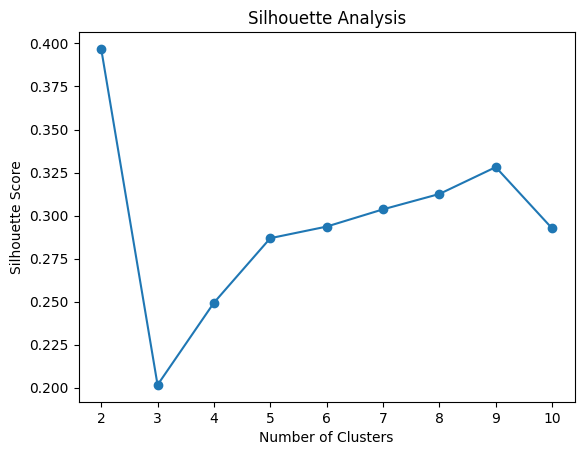

The silhouette score using 3 number of clusters is: 0.319
The silhouette score using 4 number of clusters is: 0.330
The silhouette score using 5 number of clusters is: 0.293
The silhouette score using 6 number of clusters is: 0.293


In [ ]:
# Silhouette Score analysis to estimate quantity of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=310)
    labels = kmeans.fit_predict(cluster_data)
    silhouette_scores.append(silhouette_score(cluster_data, labels))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Calculate silhouette scores for different numbers of clusters
for n_clusters in range(3, 7):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, tol=1e-4, random_state=0, n_init=10)
    kmeans_cluster_labels = kmeans.fit_predict(cluster_data)
    silhouette_avg = silhouette_score(cluster_data, kmeans_cluster_labels)
    print(f"The silhouette score using {n_clusters} number of clusters is: {silhouette_avg:.3f}")

Perks:

* One Night Free Hotel With Flight
* Free Hotel Meal
* Free Cancellation
* Free Checked Bag
* Exclusive Discounts

##Cluster Centroids with Heatmap - Summary:

After carefully reviewing the correlation heatmaps, I have selected five features for my K-Means clustering analysis, ensuring that these features are sufficiently independent from one another. These features align with specific perks, as described below:

**Average Dollars Saved:** This feature represents the average amount saved through flight and hotel discounts. It is highly relevant for the **Exclusive Discounts** perk, helping to identify users who would benefit from such offers. While useful, it shows a slightly higher correlation with cancellation-related features than I would prefer.

**Checked Bag Percentage:** This feature calculates the percentage of checked bags relative to total flights booked. It is key to the **Free Checked Bag** perk and helps identify users who frequently check bags. It is not highly correlated with other features, making it an ideal candidate for clustering users who would appreciate this perk.

**Hotel Booking Frequency:** This feature tracks how often a user books hotels during sessions. It is highly relevant for identifying users who would benefit from the **Free Hotel Meal** perk. While it has a slight correlation with cancellation features, it is otherwise independent and provides valuable insights into user behavior related to hotel bookings.

**Short Trip Percentage:** This feature measures the percentage of short trips in the dataset and is crucial for the **One Night Free Hotel With Flight** perk. Users who frequently take short trips are likely to find this perk valuable. This feature is relatively independent of hotel booking features, making it an effective indicator for clustering users interested in short trips.

**Proportion of Cancellations:** This feature calculates the ratio of cancellations to total bookings, offering insights into users' booking behavior. It is especially relevant for the **Free Cancellation** perk, targeting users who rarely cancel and prefer more security in their bookings. Despite the challenge of limited cancellation data, this feature can help cluster users who are cautious in their booking behavior and may benefit from this perk.

With the feature set defined, I am prepared to move forward with the analysis. First, I will create an elbow plot to determine the optimal number of clusters for the dataset. Then, I will apply the K-Means algorithm to generate the clusters.

Lastly, I will visualize the cluster centroids with a heatmap, which will highlight the relationship between the clusters and the perks, offering valuable insights into how these clusters align with specific user preferences.

### Cluster the Data or Segment the data with KMeans

In [ ]:
num_cols = ['avg_usd_saved', 'hotel_booking_frequency','short_trip_percentage','proportion_of_cancellations','checked_bag_percentage']

In [ ]:
#create the kmeans
from sklearn.cluster import KMeans

In [ ]:
scaled_data = MinMaxScaler().fit_transform(new_data[num_cols])

In [ ]:
kmeans = KMeans(n_clusters =4)
kmeans.fit(scaled_data)

KMeans(n_clusters=4)

### We can use PCA for mapping high dimenssional space into the lower keeping the main information of the data

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 3)
data_pca = pca.fit_transform(scaled_data)

In [ ]:
data_pca

array([[ 0.40580863, -0.05483845,  0.09918124],
       [-0.59334794, -0.09391603,  0.10647127],
       [ 0.39532467,  0.25906746,  0.13832051],
       ...,
       [ 0.38691243,  0.35151579, -0.06516236],
       [ 0.38484542,  0.47129464,  0.15257096],
       [-0.60929715,  0.28371468,  0.14169558]])

In [ ]:
px.scatter_3d(x = data_pca[:,0],
              y = data_pca[:,1],
              z = data_pca[:,2],
              color = kmeans.labels_)

In [ ]:
# 2D scatter plot to project the 3D plot in one plane
px.scatter(
    x=data_pca[:, 0],
    y=data_pca[:, 1],
    color=kmeans.labels_,
    labels={'x': 'PC1', 'y': 'PC2'},  # Label axes for Principal Components
    title='2D PCA Projection')

In [ ]:
new_data['avg_usd_saved'] =kmeans.labels_
new_data

user_id                                  trip_id       session_start  \
0       149058  149058-0562d645484d450b8908ae40825aaf46 2023-01-04 13:30:00   
1       349132  349132-e1efc771d650473cafce78596f667408 2023-01-04 19:46:00   
2       380874  380874-1f29a1cd5b964153ab337c08a4c5a151 2023-01-04 17:18:00   
3       400275  400275-f11d25e1bd574bbfa8892ea675a3dbdf 2023-01-04 06:13:00   
4       407250  407250-9152c91fdf754cffbb345776da107919 2023-01-04 01:10:00   
...        ...                                      ...                 ...   
16697   589228  589228-7cbd8bd73eed4c549a0074919e71fdc8 2023-07-20 21:01:17   
16698   671151  671151-a25acb9062764a168fbd4286d15d57fd 2023-07-24 17:45:47   
16699   609393  609393-b92d487037ec447db1e3ddf977709a52 2023-07-21 21:02:05   
16700   562275  562275-5b2550a902f14543a77ca64eccdce8f8 2023-07-21 21:17:07   
16701   591582  591582-61f9e9bfb2dd461989dacc9f5b76371b 2023-07-21 10:24:10   

               session_end  page_clicks  flight_discount  \
0      2023-01-04 13:31:57           16            False   
1      2023-01-04 19:48:11           18            False   
2      2023-01-04 17:20:18           19            False   
3      2023-01-04 06:19:34           52             True   
4      2023-01-04 01:12:27           20            False   
...                    ...          ...              ...   
16697                    0           43             True   
16698                    0           23             True   
16699                    0           25             True   
16700                    0          139             True   
16701                    0           10             True   

       flight_discount_amount  hotel_discount  hotel_discount_amount  \
0                        0.00           False                   0.00   
1                        0.00           False                   0.00   
2                        0.00            True                   0.25   
3                        0.25           False                   0.00   
4                        0.00           False                   0.00   
...                       ...             ...                    ...   
16697                    0.00            True                   0.00   
16698                    0.00            True                   0.00   
16699                    0.00            True                   0.00   
16700                    0.00            True                   0.00   
16701                    0.00            True                   0.00   

       flight_booked  ...  proportion_of_cancellations  \
0               True  ...                    -0.369636   
1               True  ...                    -0.369636   
2               True  ...                    -0.369636   
3               True  ...                    -0.369636   
4               True  ...                    -0.369636   
...              ...  ...                          ...   
16697           True  ...                     1.393632   
16698           True  ...                     1.589550   
16699           True  ...                     1.589550   
16700           True  ...                     1.099754   
16701           True  ...                     1.393632   

       cancellation_percentage  engagement_score  browsing_only_engagement  \
0                    -0.369636          0.206817                  0.187767   
1                    -0.369636         -0.523168                 -0.514189   
2                    -0.369636         -0.662213                 -0.666279   
3                    -0.369636         -0.569517                 -0.560986   
4                    -0.369636         -0.187143                 -0.198309   
...                        ...               ...                       ...   
16697                 1.393632          1.388698                  1.381091   
16698                 1.589550          0.357449                  0.339857   
16699                 1.589550          0.774583                  0.76103

### Running K-Means with the Centroids Heatmap

proportion_of_cancellations  checked_bag_percentage  short_trip_percentage  \
0                    -0.364193               -0.099348               0.819984   
1                     2.237080                0.258837              -0.247257   
2                    -0.362836               -0.004475              -1.219536   
3                    -0.369636                0.037632               0.445246   

   hotel_booking_frequency  avg_usd_saved  
0                 0.498405      -0.251541  
1                -0.127836       1.478052  
2                 0.253577      -0.223160  
3                -1.744356      -0.247742

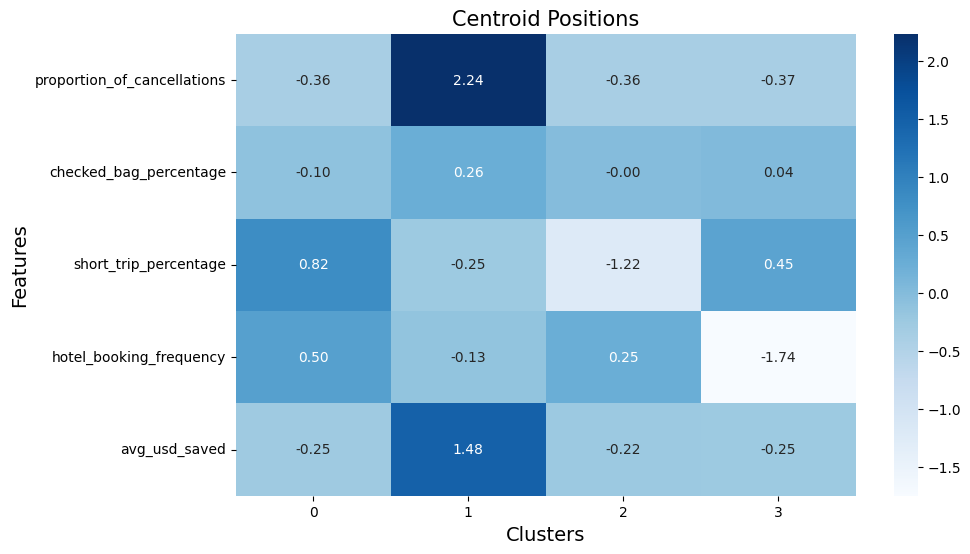

assigned_cluster
Cluster 0    6823
Cluster 2    5029
Cluster 3    2509
Cluster 1    2341
Name: count, dtype: int64


In [ ]:
# Example clustering
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
cluster_labels = kmeans.fit_predict(cluster_data)

# Add cluster labels to the DataFrame
new_data['kmeans_cluster'] = cluster_labels

# Display cluster centroids
model_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=cluster_columns)
display(model_centroids)

# Create a heatmap to visualise cluster centroids with annotations
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(model_centroids.T, cmap="Blues", annot=True, fmt=".2f")
heatmap.set_xlabel("Clusters", fontsize=14)
heatmap.set_ylabel("Features", fontsize=14)
heatmap.set_title("Centroid Positions", fontsize=15)
plt.show()

# Analyse clusters and assign labels based on characteristics
cluster_characteristics = new_data.groupby('kmeans_cluster')[cluster_columns].mean()

# Use actual cluster labels from the data
unique_clusters = new_data['kmeans_cluster'].unique()

# Determine labels based on characteristics
cluster_perk_mapping = {}

for cluster_num in unique_clusters:
    cluster_characteristic_values = cluster_characteristics.loc[cluster_num]

    # Customize the label generation logic as needed
    label = f'Cluster {cluster_num}'
    cluster_perk_mapping[cluster_num] = label

# Map clusters to assigned labels
new_data['assigned_cluster'] = new_data['kmeans_cluster'].map(cluster_perk_mapping)

# Display the count of assigned labels
perk_counts = new_data['assigned_cluster'].value_counts()
print(perk_counts)


**Cluster 0:**
Customers have a negative cancellation rate (-0.36) and a low checked bag preference (-0.10). They frequently take short trips (82%) but rarely book hotels (0.50). Their average savings are negative as well (-0.25).

**Cluster 1:**
This group shows high proportion of cancellations (2.24) and a relative low checked bag preference (0.26). They rarely take short trips (-0.25) and have low hotel bookings (-0-13). They care a lot about save money (1.48).

**Cluster 2:**
Low cancellation rate (-0.36), moderate hotel bookings (0.25), and relatively low savings (-0.22). They rarely take short trips (-1.22) and they havent checked bag preference.

**Cluster 3:**
Low cancellations (0.37) with infrequent checked bag usage (0.04). They frequently take short trips (0.45) but rarely book hotels (-1.74). Savings are slightly negative (-0.25).

In [ ]:
cluster_data.shape

(16702, 5)

### Check the silhouette Score (se)

In [ ]:
# Compute the Silhouette Score
silhouette_avg = silhouette_score(cluster_data, new_data['kmeans_cluster'])

print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.33040754582718634


The Silhouette Score evaluates clustering quality by comparing how well data points fit within their assigned cluster versus how close they are to neighboring clusters.

A score of 0.330 suggests moderate clustering quality, indicating some separation between clusters but with overlaps or ambiguities. Higher scores (closer to 1) indicate clear, distinct clusters, while lower scores (near -1) signal poorly defined clusters.

## Assigning perks to each group:

**Cluster 0:**

Perk: **One Night Free Hotel With Flight**

Reason: This group frequently takes short trips (82%), which aligns well with this perk since a free hotel night can make a significant impact for short-duration travelers. Their low hotel bookings suggest this perk could encourage more hotel engagement.
Cluster 1

Perk: **Exclusive Discounts**

Reason: The group cares most about saving money (1.48) and has a high cancellation rate, possibly indicating sensitivity to costs. Offering discounts could solidify their loyalty by appealing to their price-conscious behavior.

**Cluster 2:**

Perk: **Free Checked Bag**

Reason: These customers lack a strong preference for short trips or savings, but offering a tangible benefit like free checked bags could enhance their experience and incentivize more bookings.


**Cluster 3:**

Perk: **Free Hotel Meal**

Reason: Though they rarely book hotels (-1.74), they occasionally take short trips (0.45). A free meal could be a low-risk incentive to increase engagement with hotel services during their short stays.

**General Assignment:**

**Free Cancellation:** This perk is not assigned to any specific cluster here, as no group exhibits cancellation behavior that would strongly align with this perk. However, it could be offered broadly as an added reassurance for customers across all clusters.

By strategically matching perks with customer behavior, the incentives can drive greater engagement and loyalty, ultimately benefiting both the customers and the business.

### Assign the Perk to the respective cluster:

In [ ]:
cluster_labels_mapping = {
    0: "One Night Free Hotel With Flight",
    1: "Exclusive Discounts",
    2: "Free Checked Bag",
    3: "Free Hotel Meal"
}

# Map clusters to perks
new_data['assigned_perk'] = new_data['kmeans_cluster'].map(cluster_labels_mapping)

# Print labels and their corresponding clusters
labels_and_clusters = {v: k for k, v in cluster_labels_mapping.items()}
for label, cluster in labels_and_clusters.items():
    print(f"Cluster {cluster}: {label}")

Cluster 0: One Night Free Hotel With Flight
Cluster 1: Exclusive Discounts
Cluster 2: Free Checked Bag
Cluster 3: Free Hotel Meal


In [ ]:
new_data.head()

user_id                                  trip_id       session_start  \
0   149058  149058-0562d645484d450b8908ae40825aaf46 2023-01-04 13:30:00   
1   349132  349132-e1efc771d650473cafce78596f667408 2023-01-04 19:46:00   
2   380874  380874-1f29a1cd5b964153ab337c08a4c5a151 2023-01-04 17:18:00   
3   400275  400275-f11d25e1bd574bbfa8892ea675a3dbdf 2023-01-04 06:13:00   
4   407250  407250-9152c91fdf754cffbb345776da107919 2023-01-04 01:10:00   

           session_end  page_clicks  flight_discount  flight_discount_amount  \
0  2023-01-04 13:31:57           16            False                    0.00   
1  2023-01-04 19:48:11           18            False                    0.00   
2  2023-01-04 17:20:18           19            False                    0.00   
3  2023-01-04 06:19:34           52             True                    0.25   
4  2023-01-04 01:12:27           20            False                    0.00   

   hotel_discount  hotel_discount_amount  flight_booked  ...  \
0           False                   0.00           True  ...   
1           False                   0.00           True  ...   
2            True                   0.25           True  ...   
3           False                   0.00           True  ...   
4           False                   0.00           True  ...   

   browsing_only_engagement  baggage_with_flight  checked_bag_percentage  \
0                  0.187767             0.464682               -0.382309   
1                 -0.514189             0.464682               -0.166696   
2                 -0.666279             0.464682                0.192661   
3                 -0.560986             0.464682               -0.166696   
4                 -0.198309             0.464682               -0.705730   

   avg_usd_saved_hotels  discount_utilisation_rate  \
0             -0.723996                   0.680843   
1              0.474818                   0.680843   
2              2.872446                   0.680843   
3             -0.723996                   0.680843   
4             -0.723996                  -1.468767   

  discount_utilisation_frequency  avg_usd_saved_per_distance kmeans_cluster  \
0                      -0.447891                   -0.208766              0   
1                      -0.050606                    0.001179              2   
2                       1.935819                   -0.034140              0   
3                       1.935819                   -0.134707              3   
4                      -1.043819                   -0.309507              3   

   assigned_cluster                     assigned_perk  
0         Cluster 0  One Night Free Hotel With Flight  
1         Cluster 2                  Free Checked Bag  
2         Cluster 0  One Night Free Hotel With Flight  
3         Cluster 3                   Free Hotel Meal  
4         Cluster 3                   Free Hotel Meal  

[5 rows x 81 columns]

In [ ]:
new_data.keys()

Index(['user_id', 'trip_id', 'session_start', 'session_end', 'page_clicks',
       'flight_discount', 'flight_discount_amount', 'hotel_discount',
       'hotel_discount_amount', 'flight_booked', 'home_airport_lat',
       'home_airport_lon', 'hotel_booked', 'cancellation', 'session_duration',
       'gender', 'married', 'has_children', 'seats', 'departure_time',
       'return_time', 'checked_bags', 'destination_airport_lat',
       'destination_airport_lon', 'nights', 'rooms',
       'hotel_price_per_room_night_usd', 'age', 'session_duration_min',
       'time_spent', 'num_flights', 'money_spent_hotel', 'total_flight_spend',
       'time_before_trip', 'total_cost_hotel', 'discount_hotel_proportion',
       'total_cost_flights', 'discount_flight_proportion',
       'haversine_distance', 'great_circle_distance', 'avg_km_flown',
       'num_clicks', 'num_sessions', 'avg_sessions_duration', 'num_of_trips',
       'total_flight_discount', 'total_hotel_discount', 'total_flights_booked',
   

In [ ]:
# Display a random sample of 10 users with their assigned perks
sample_data = new_data[['user_id', 'kmeans_cluster', 'assigned_perk','age_group', 'groups_travelers']].sample(n=20, random_state=42)
sample_data

user_id  kmeans_cluster                     assigned_perk    age_group  \
4881    549572               2                  Free Checked Bag  40-59 Adult   
9481    573291               0  One Night Free Hotel With Flight  40-59 Adult   
1739    529831               0  One Night Free Hotel With Flight  25-39 Young   
16678   640689               1               Exclusive Discounts  40-59 Adult   
4560    515051               2                  Free Checked Bag  40-59 Adult   
11455   536228               0  One Night Free Hotel With Flight          <25   
9720    576612               0  One Night Free Hotel With Flight  25-39 Young   
14546   644870               2                  Free Checked Bag  40-59 Adult   
2471    530645               0  One Night Free Hotel With Flight  25-39 Young   
9373    582785               0  One Night Free Hotel With Flight  40-59 Adult   
4843    521956               2                  Free Checked Bag  25-39 Young   
16492   545736               1               Exclusive Discounts          <25   
9140    616222               0  One Night Free Hotel With Flight  40-59 Adult   
4336    522532               0  One Night Free Hotel With Flight  25-39 Young   
1710    516144               3                   Free Hotel Meal  40-59 Adult   
7332    546161               2                  Free Checked Bag  40-59 Adult   
15195   474120               1               Exclusive Discounts  40-59 Adult   
6706    503418               0  One Night Free Hotel With Flight  40-59 Adult   
3314    511122               0  One Night Free Hotel With Flight  40-59 Adult   
14261   529048               0  One Night Free Hotel With Flight   60+ Senior   

                 groups_travelers  
4881                New Traveller  
9481                New Traveller  
1739   Frequent Leisure Traveller  
16678               New Traveller  
4560                New Traveller  
11455       Experienced Traveller  
9720   Frequent Leisure Traveller  
14546               New Traveller  
2471   Frequent Leisure Traveller  
9373                New Traveller  
4843   Frequent Leisure Traveller  
16492  Frequent Leisure Traveller  
9140                       others  
4336   Frequent Leisure Traveller  
1710                New Traveller  
7332                       others  
15195           Family Travellers  
6706                New Traveller  
3314                       others  
14261            Senior Traveller

### Overview to the distribution of the perks by selected 3 features.

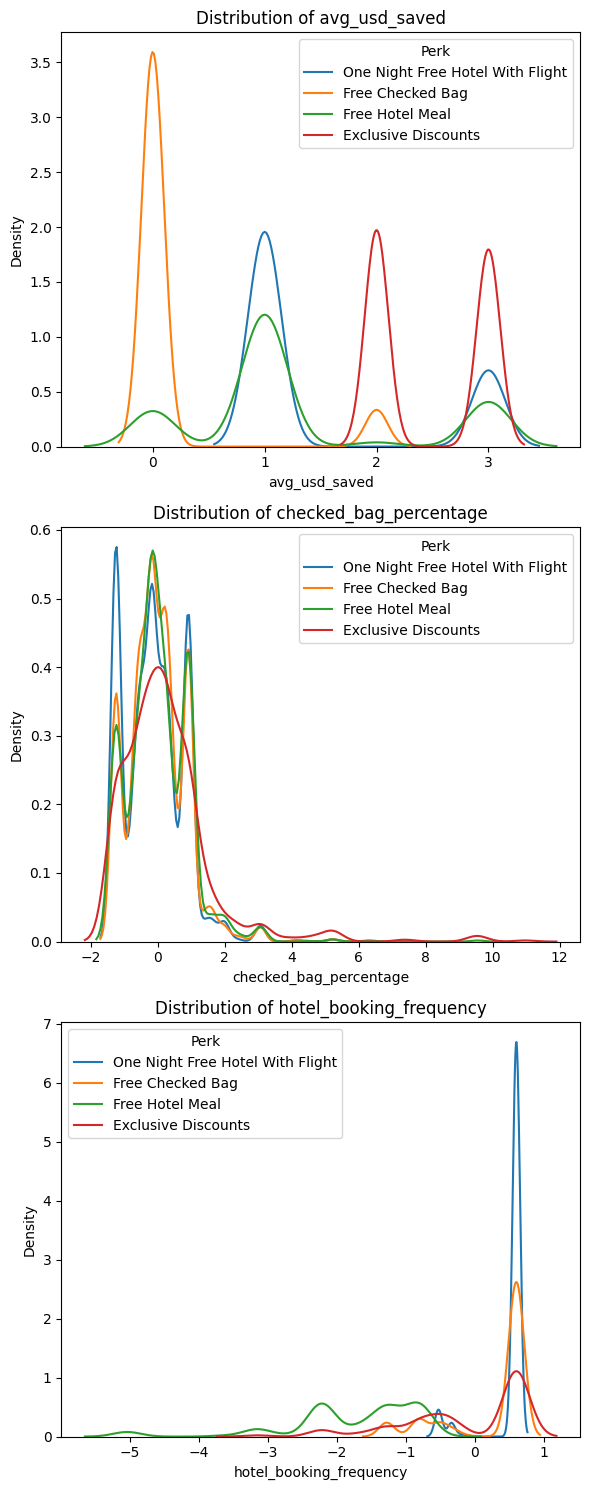

In [ ]:
# Define the list of features
list_of_features = ["avg_usd_saved", "checked_bag_percentage", "hotel_booking_frequency"]

# Create subplots for each feature
fig, axes = plt.subplots(nrows=len(list_of_features), ncols=1, figsize=(6, 15))

# Loop through each feature and plot KDE for each perk
for i, feature in enumerate(list_of_features):
    ax = axes[i]
    for perk in new_data['assigned_perk'].unique():
        sns.kdeplot(data=new_data[new_data['assigned_perk'] == perk], x=feature, label=perk, ax=ax)
    ax.set_title(f"Distribution of {feature}")
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")
    ax.legend(title="Perk")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [ ]:
new_data.keys()

Index(['user_id', 'trip_id', 'session_start', 'session_end', 'page_clicks',
       'flight_discount', 'flight_discount_amount', 'hotel_discount',
       'hotel_discount_amount', 'flight_booked', 'home_airport_lat',
       'home_airport_lon', 'hotel_booked', 'cancellation', 'session_duration',
       'gender', 'married', 'has_children', 'seats', 'departure_time',
       'return_time', 'checked_bags', 'destination_airport_lat',
       'destination_airport_lon', 'nights', 'rooms',
       'hotel_price_per_room_night_usd', 'age', 'session_duration_min',
       'time_spent', 'num_flights', 'money_spent_hotel', 'total_flight_spend',
       'time_before_trip', 'total_cost_hotel', 'discount_hotel_proportion',
       'total_cost_flights', 'discount_flight_proportion',
       'haversine_distance', 'great_circle_distance', 'avg_km_flown',
       'num_clicks', 'num_sessions', 'avg_sessions_duration', 'num_of_trips',
       'total_flight_discount', 'total_hotel_discount', 'total_flights_booked',
   

In [ ]:
new_data

user_id                                  trip_id       session_start  \
0       149058  149058-0562d645484d450b8908ae40825aaf46 2023-01-04 13:30:00   
1       349132  349132-e1efc771d650473cafce78596f667408 2023-01-04 19:46:00   
2       380874  380874-1f29a1cd5b964153ab337c08a4c5a151 2023-01-04 17:18:00   
3       400275  400275-f11d25e1bd574bbfa8892ea675a3dbdf 2023-01-04 06:13:00   
4       407250  407250-9152c91fdf754cffbb345776da107919 2023-01-04 01:10:00   
...        ...                                      ...                 ...   
16697   589228  589228-7cbd8bd73eed4c549a0074919e71fdc8 2023-07-20 21:01:17   
16698   671151  671151-a25acb9062764a168fbd4286d15d57fd 2023-07-24 17:45:47   
16699   609393  609393-b92d487037ec447db1e3ddf977709a52 2023-07-21 21:02:05   
16700   562275  562275-5b2550a902f14543a77ca64eccdce8f8 2023-07-21 21:17:07   
16701   591582  591582-61f9e9bfb2dd461989dacc9f5b76371b 2023-07-21 10:24:10   

               session_end  page_clicks  flight_discount  \
0      2023-01-04 13:31:57           16            False   
1      2023-01-04 19:48:11           18            False   
2      2023-01-04 17:20:18           19            False   
3      2023-01-04 06:19:34           52             True   
4      2023-01-04 01:12:27           20            False   
...                    ...          ...              ...   
16697                    0           43             True   
16698                    0           23             True   
16699                    0           25             True   
16700                    0          139             True   
16701                    0           10             True   

       flight_discount_amount  hotel_discount  hotel_discount_amount  \
0                        0.00           False                   0.00   
1                        0.00           False                   0.00   
2                        0.00            True                   0.25   
3                        0.25           False                   0.00   
4                        0.00           False                   0.00   
...                       ...             ...                    ...   
16697                    0.00            True                   0.00   
16698                    0.00            True                   0.00   
16699                    0.00            True                   0.00   
16700                    0.00            True                   0.00   
16701                    0.00            True                   0.00   

       flight_booked  ...  browsing_only_engagement  baggage_with_flight  \
0               True  ...                  0.187767             0.464682   
1               True  ...                 -0.514189             0.464682   
2               True  ...                 -0.666279             0.464682   
3               True  ...                 -0.560986             0.464682   
4               True  ...                 -0.198309             0.464682   
...              ...  ...                       ...                  ...   
16697           True  ...                  1.381091             0.464682   
16698           True  ...                  0.339857             0.464682   
16699           True  ...                  0.761030             0.464682   
16700           True  ...                  2.527618             0.464682   
16701           True  ...                  1.205602             0.464682   

       checked_bag_percentage  avg_usd_saved_hotels  \
0                   -0.382309             -0.723996   
1                   -0.166696              0.474818   
2                    0.192661              2.872446   
3                   -0.166696             -0.723996   
4                   -0.705730             -0.723996   
...                       ...                   ...   
16697               -0.382309             -0.004708   
16698                0.911374              1.074225   
16699               -0.382309              1.074225   
16700    

### Fixing my final Table

In [ ]:
# Lista de columnas que deseas incluir en la nueva tabla
columns_to_keep = ['user_id', 'session_start', 'session_end','home_airport_lat',
       'home_airport_lon','gender', 'married', 'has_children','seats', 'departure_time',
       'return_time', 'checked_bags','destination_airport_lat',
       'destination_airport_lon', 'nights', 'rooms',
       'hotel_price_per_room_night_usd', 'age', 'session_duration_min', 'money_spent_hotel', 'total_flight_spend',
       'time_before_trip', 'total_cost_hotel', 'discount_hotel_proportion',
       'total_cost_flights', 'discount_flight_proportion',
       'haversine_distance', 'avg_km_flown',
       'num_clicks', 'num_sessions', 'avg_sessions_duration', 'num_of_trips', 'total_checked_bags',
       'age_group', 'groups_travelers','avg_usd_saved', 'flight_hotel_combination', 'hotel_booking_frequency', 'proportion_of_cancellations',
       'engagement_score', 'baggage_with_flight', 'assigned_cluster',
       'assigned_perk']
# Reemplaza con tus nombres de columnas# Crear el nuevo DataFrame con solo esas columnas
final_table = new_data[columns_to_keep]

In [ ]:
final_table.shape

(16702, 43)

In [ ]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16702 entries, 0 to 16701
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   user_id                         16702 non-null  int64         
 1   session_start                   16702 non-null  datetime64[ns]
 2   session_end                     16702 non-null  object        
 3   home_airport_lat                16702 non-null  float64       
 4   home_airport_lon                16702 non-null  float64       
 5   gender                          16702 non-null  object        
 6   married                         16702 non-null  int64         
 7   has_children                    16702 non-null  object        
 8   seats                           16702 non-null  float64       
 9   departure_time                  16702 non-null  datetime64[ns]
 10  return_time                     16702 non-null  datetime64[ns]
 11  ch

In [ ]:
# Inspect the unique values in the columns
print(final_table['married'].unique())
print(final_table['has_children'].unique())

# Map the string values to numerical or boolean
final_table['married'] = final_table['married'].map({'Yes': 1, 'No': 0, True: 1, False: 0})
final_table['has_children'] = final_table['has_children'].map({'With Children': 1, 'No Children': 0, True: 1, False: 0})

# Replace null values with 0 and convert the column to integer
final_table['has_children'] = final_table['has_children'].fillna(0).astype(int)


# Verify the conversion
print(final_table[['married', 'has_children']].head())

[0 1]
['With Children' 'Without Children']
   married  has_children
0        0             1
1        0             0
2        1             0
3        1             1
4        0             0


<ipython-input-279-b0238b5b695d>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-279-b0238b5b695d>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-279-b0238b5b695d>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16702 entries, 0 to 16701
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   user_id                         16702 non-null  int64         
 1   session_start                   16702 non-null  datetime64[ns]
 2   session_end                     16702 non-null  object        
 3   home_airport_lat                16702 non-null  float64       
 4   home_airport_lon                16702 non-null  float64       
 5   gender                          16702 non-null  object        
 6   married                         16702 non-null  int64         
 7   has_children                    16702 non-null  int64         
 8   seats                           16702 non-null  float64       
 9   departure_time                  16702 non-null  datetime64[ns]
 10  return_time                     16702 non-null  datetime64[ns]
 11  ch

### I download my CSV file with the users assigned to the respective rewards program

In [ ]:
from google.colab import files

# Exporting the filtered table to a .csv file
final_table.to_csv('traveltidefinalsubmission.csv', index=False)
files.download('traveltidefinalsubmission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Upload the new Dataset for the respective analysis

In [ ]:
import pandas as pd

# Load CSV file into a DataFrame
file_path = 'traveltidefinalsubmission.csv'  # Replace with your actual file path
df = pd.read_csv('traveltidefinalsubmission.csv')

# Display the first few rows to confirm it's loaded correctly
print(df.head())

   user_id        session_start          session_end  home_airport_lat  \
0   149058  2023-01-04 13:30:00  2023-01-04 13:31:57            33.563   
1   349132  2023-01-04 19:46:00  2023-01-04 19:48:11            39.046   
2   380874  2023-01-04 17:18:00  2023-01-04 17:20:18            38.228   
3   400275  2023-01-04 06:13:00  2023-01-04 06:19:34            33.535   
4   407250  2023-01-04 01:10:00  2023-01-04 01:12:27            27.544   

   home_airport_lon gender  married  has_children     seats  \
0           -86.753      F        0             1 -0.055396   
1           -84.662      F        0             0  2.840473   
2           -85.664      F        1             0 -0.055396   
3          -112.383      F        1             1 -0.055396   
4           -99.461      F        0             0 -0.055396   

        departure_time  ...    age_group            groups_travelers  \
0  2023-01-09 10:00:00  ...  40-59 Adult               New Traveller   
1  2023-01-13 09:00:00  ...  40-

<ipython-input-32-87158770bd89>:5: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('traveltidefinalsubmission.csv')


After the final table with the clusters and the segmentation by user levels in the benefits (perks), I proceed to make the respective graphics for better interpretation and analysis of the data.

In [ ]:
df.keys()

Index(['user_id', 'session_start', 'session_end', 'home_airport_lat',
       'home_airport_lon', 'gender', 'married', 'has_children', 'seats',
       'departure_time', 'return_time', 'checked_bags',
       'destination_airport_lat', 'destination_airport_lon', 'nights', 'rooms',
       'hotel_price_per_room_night_usd', 'age', 'session_duration_min',
       'money_spent_hotel', 'total_flight_spend', 'time_before_trip',
       'total_cost_hotel', 'discount_hotel_proportion', 'total_cost_flights',
       'discount_flight_proportion', 'haversine_distance', 'avg_km_flown',
       'num_clicks', 'num_sessions', 'avg_sessions_duration', 'num_of_trips',
       'total_checked_bags', 'age_group', 'groups_travelers', 'avg_usd_saved',
       'flight_hotel_combination', 'hotel_booking_frequency',
       'proportion_of_cancellations', 'engagement_score',
       'baggage_with_flight', 'assigned_cluster', 'assigned_perk'],
      dtype='object')

### Unique users by Assigned Perk

<ipython-input-34-c56bf4d1b468>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=perk_counts, x='assigned_perk', y='user_count', palette='viridis')


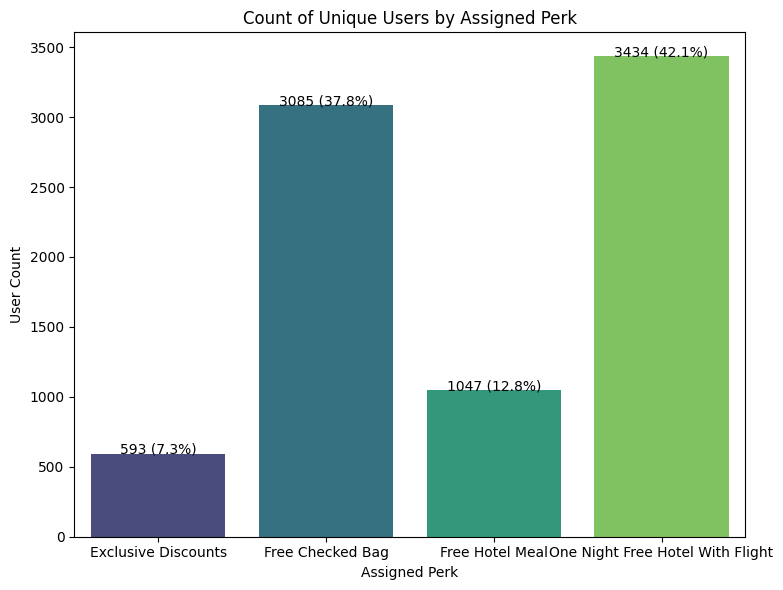

In [ ]:
# Group by `assigned_perk` and count unique `user_id`
perk_counts = df.groupby('assigned_perk')['user_id'].nunique().reset_index()
perk_counts.rename(columns={'user_id': 'user_count'}, inplace=True)

# Calculate percentages
total_users = perk_counts['user_count'].sum()
perk_counts['percentage'] = (perk_counts['user_count'] / total_users) * 100

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(data=perk_counts, x='assigned_perk', y='user_count', palette='viridis')

# Add labels (count and percentage) to each bar
for index, row in perk_counts.iterrows():
    plt.text(
        x=index,
        y=row['user_count'] + 0.5,  # Slightly above the bar
        s=f"{row['user_count']} ({row['percentage']:.1f}%)",
        ha='center',
        fontsize=10
    )

# Customize the plot
plt.title('Count of Unique Users by Assigned Perk')
plt.xlabel('Assigned Perk')
plt.ylabel('User Count')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

### Count of users by Children and Gender




<Figure size 1000x600 with 0 Axes>

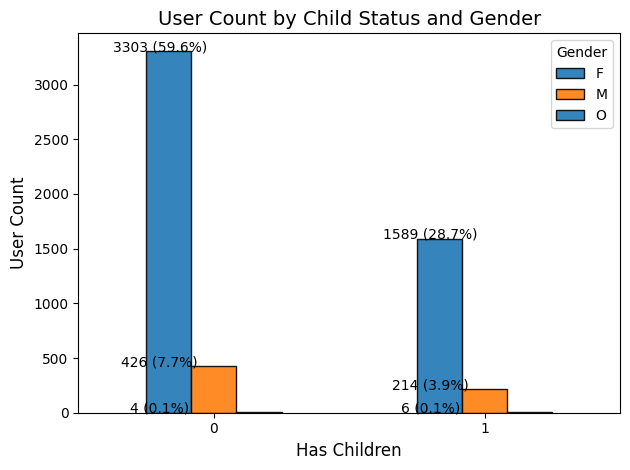

In [ ]:
# Group by `has_child` and `gender` and count unique `user_id`
grouped = df.groupby(['has_children', 'gender'])['user_id'].nunique().reset_index()
grouped.rename(columns={'user_id': 'user_count'}, inplace=True)

# Calculate percentages
total_count = grouped['user_count'].sum()
grouped['percentage'] = (grouped['user_count'] / total_count) * 100

# Pivot the table for plotting (optional for grouped bars)
pivot_df = grouped.pivot(index='has_children', columns='gender', values='user_count').fillna(0)

# Plot the grouped bar chart
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=False, color=['#1f77b4', '#ff7f0e'], alpha=0.9, edgecolor='black')

# Add labels for counts and percentages
for i, (has_children, row) in enumerate(grouped.groupby('has_children')):
    for j, gender_row in row.iterrows():
        plt.text(
            x=i + (0.2 if gender_row['gender'] == 'Female' else -0.2),  # Adjust position for grouping
            y=gender_row['user_count'] + 0.3,  # Slightly above the bar
            s=f"{gender_row['user_count']} ({gender_row['percentage']:.1f}%)",
            ha='center', fontsize=10
        )

# Customize the plot
plt.title('User Count by Child Status and Gender', fontsize=14)
plt.xlabel('Has Children', fontsize=12)
plt.ylabel('User Count', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Gender', fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

### Count of Users by Gender

<ipython-input-36-a03c75d30408>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_counts, x='gender', y='user_count', palette='viridis')


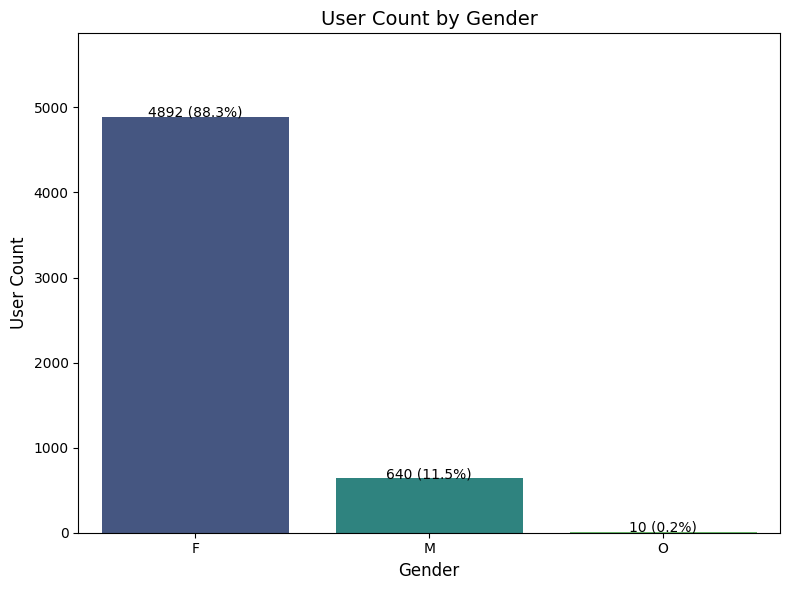

In [ ]:
# Group by `gender` and count unique `user_id`
gender_counts = df.groupby('gender')['user_id'].nunique().reset_index()
gender_counts.rename(columns={'user_id': 'user_count'}, inplace=True)

# Calculate percentages
total_count = gender_counts['user_count'].sum()
gender_counts['percentage'] = (gender_counts['user_count'] / total_count) * 100

# Plot the data
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_counts, x='gender', y='user_count', palette='viridis')

# Add labels for counts and percentages
for index, row in gender_counts.iterrows():
    plt.text(
        x=index,
        y=row['user_count'] + 0.3,  # Slightly above the bar
        s=f"{row['user_count']} ({row['percentage']:.1f}%)",
        ha='center',
        fontsize=10
    )

# Customize the plot
plt.title('User Count by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('User Count', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, gender_counts['user_count'].max() * 1.2)  # Add space above bars for labels
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
df.keys()


Index(['user_id', 'session_start', 'session_end', 'home_airport_lat',
       'home_airport_lon', 'gender', 'married', 'has_children', 'seats',
       'departure_time', 'return_time', 'checked_bags',
       'destination_airport_lat', 'destination_airport_lon', 'nights', 'rooms',
       'hotel_price_per_room_night_usd', 'age', 'session_duration_min',
       'money_spent_hotel', 'total_flight_spend', 'time_before_trip',
       'total_cost_hotel', 'discount_hotel_proportion', 'total_cost_flights',
       'discount_flight_proportion', 'haversine_distance', 'avg_km_flown',
       'num_clicks', 'num_sessions', 'avg_sessions_duration', 'num_of_trips',
       'total_checked_bags', 'age_group', 'groups_travelers', 'avg_usd_saved',
       'flight_hotel_combination', 'hotel_booking_frequency',
       'proportion_of_cancellations', 'engagement_score',
       'baggage_with_flight', 'assigned_cluster', 'assigned_perk'],
      dtype='object')

### Count of Users Marry and with Childs

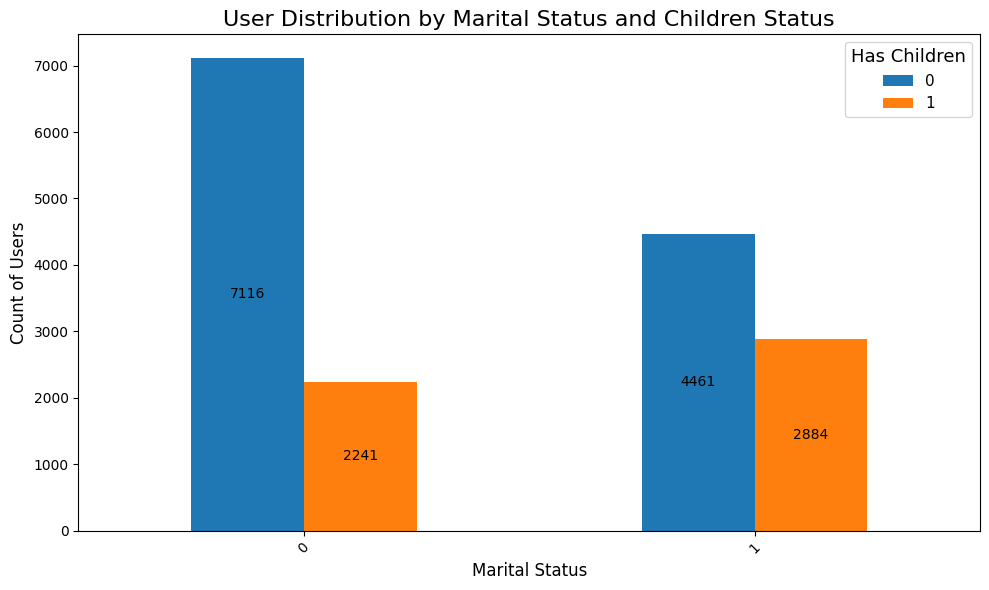

In [ ]:
# Count the occurrences based on 'married' and 'has_children'
count_data = df.groupby(['married', 'has_children']).size().unstack(fill_value=0)

# Plotting a bar chart
ax = count_data.plot(kind='bar', stacked=False, figsize=(10, 6))

# Add labels on the bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2  # Position the label at the center of each bar
    y = p.get_y() + height / 2  # Place the label in the middle of each segment
    ax.text(x, y, str(int(height)), ha='center', va='center', fontsize=10, color='black')

# Customize the plot
plt.title('User Distribution by Marital Status and Children Status', fontsize=16)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Count of Users', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Has Children', title_fontsize='13', fontsize='11')

# Show the plot
plt.tight_layout()
plt.show()

### Count of user by Groups Travelers and Assigned Perk

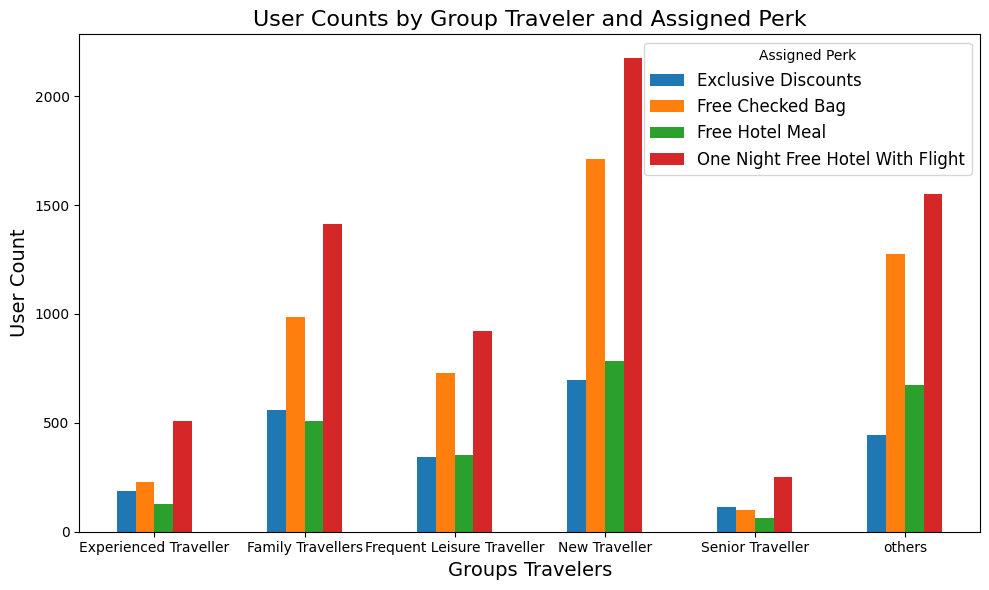

In [ ]:
# Group the data and count unique user_id
grouped = df.groupby(['groups_travelers', 'assigned_perk'])['user_id'].count().reset_index()

# Pivot the data for easier plotting
pivot = grouped.pivot(index='groups_travelers', columns='assigned_perk', values='user_id').fillna(0)

# Plot a grouped bar chart
pivot.plot(kind='bar', figsize=(10, 6))

# Customize the plot
plt.title('User Counts by Group Traveler and Assigned Perk', fontsize=16)
plt.xlabel('Groups Travelers', fontsize=14)
plt.ylabel('User Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Assigned Perk', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

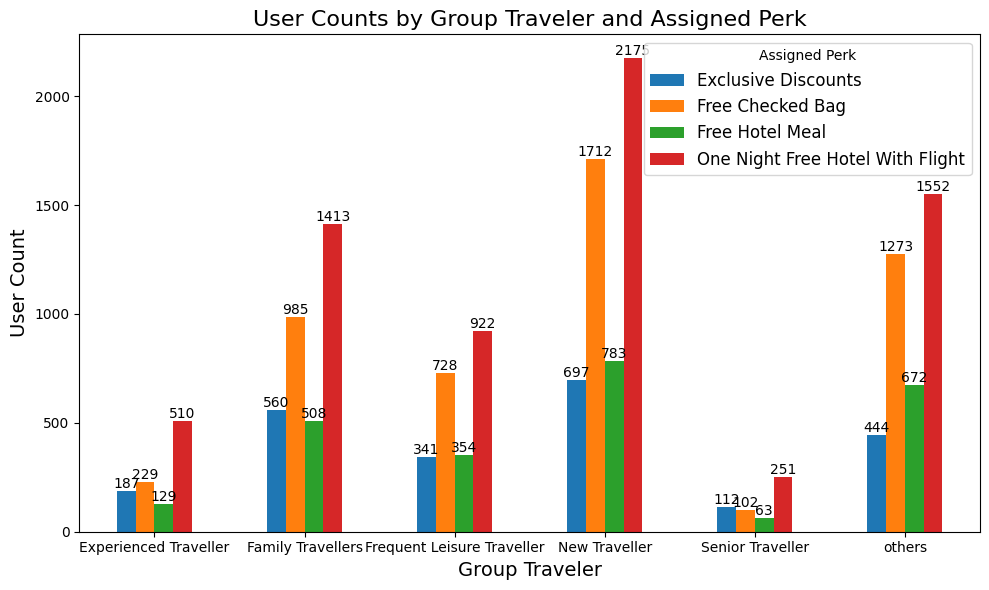

In [ ]:
# Plot again with manual labeling
ax = pivot.plot(kind='bar', figsize=(10, 6))

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=10, label_type='edge')

# Customize further
plt.title('User Counts by Group Traveler and Assigned Perk', fontsize=16)
plt.xlabel('Group Traveler', fontsize=14)
plt.ylabel('User Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Assigned Perk', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

### User Distribution by Gender, Group Travelers and Children

In [ ]:
df.keys()

Index(['user_id', 'session_start', 'session_end', 'home_airport_lat',
       'home_airport_lon', 'gender', 'married', 'has_children', 'seats',
       'departure_time', 'return_time', 'checked_bags',
       'destination_airport_lat', 'destination_airport_lon', 'nights', 'rooms',
       'hotel_price_per_room_night_usd', 'age', 'session_duration_min',
       'money_spent_hotel', 'total_flight_spend', 'time_before_trip',
       'total_cost_hotel', 'discount_hotel_proportion', 'total_cost_flights',
       'discount_flight_proportion', 'haversine_distance', 'avg_km_flown',
       'num_clicks', 'num_sessions', 'avg_sessions_duration', 'num_of_trips',
       'total_checked_bags', 'age_group', 'groups_travelers', 'avg_usd_saved',
       'flight_hotel_combination', 'hotel_booking_frequency',
       'proportion_of_cancellations', 'engagement_score',
       'baggage_with_flight', 'assigned_cluster', 'assigned_perk'],
      dtype='object')

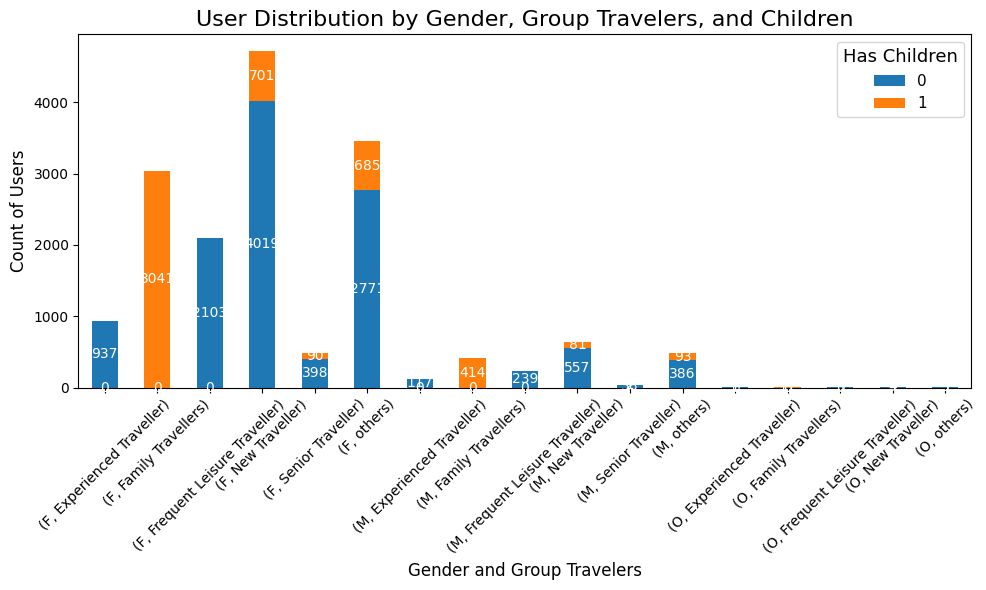

In [ ]:
# Count the occurrences based on gender, group_travelers, and has_children
count_data = df.groupby(['gender', 'groups_travelers', 'has_children']).size().unstack(level='has_children', fill_value=0)

# Plotting a stacked bar chart
ax = count_data.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels for each segment in the stacked bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2  # Position the label at the center of each bar
    y = p.get_y() + height / 2  # Place the label in the middle of each segment
    ax.text(x, y, str(int(height)), ha='center', va='center', fontsize=10, color='white')

# Customize the plot
plt.title('User Distribution by Gender, Group Travelers, and Children', fontsize=16)
plt.xlabel('Gender and Group Travelers', fontsize=12)
plt.ylabel('Count of Users', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Has Children', title_fontsize='13', fontsize='11')

# Show the plot
plt.tight_layout()
plt.show()

### Perks by Groups Travelers

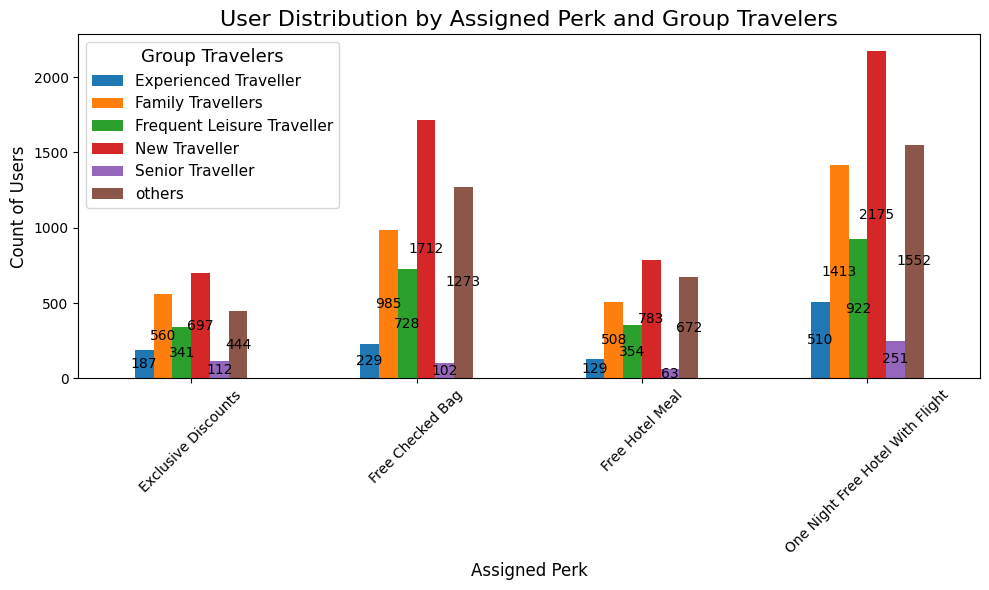

In [ ]:
# Count the occurrences based on assigned_perk and group_travelers
count_data = df.groupby(['assigned_perk', 'groups_travelers']).size().unstack(fill_value=0)

# Plotting a bar chart
ax = count_data.plot(kind='bar', stacked=False, figsize=(10, 6))

# Add labels on the bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2  # Position the label at the center of each bar
    y = p.get_y() + height / 2  # Place the label in the middle of each segment
    ax.text(x, y, str(int(height)), ha='center', va='center', fontsize=10, color='black')

# Customize the plot
plt.title('User Distribution by Assigned Perk and Group Travelers', fontsize=16)
plt.xlabel('Assigned Perk', fontsize=12)
plt.ylabel('Count of Users', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Group Travelers', title_fontsize='13', fontsize='11')

# Show the plot
plt.tight_layout()
plt.show()

### Perks assigned to User by Gender

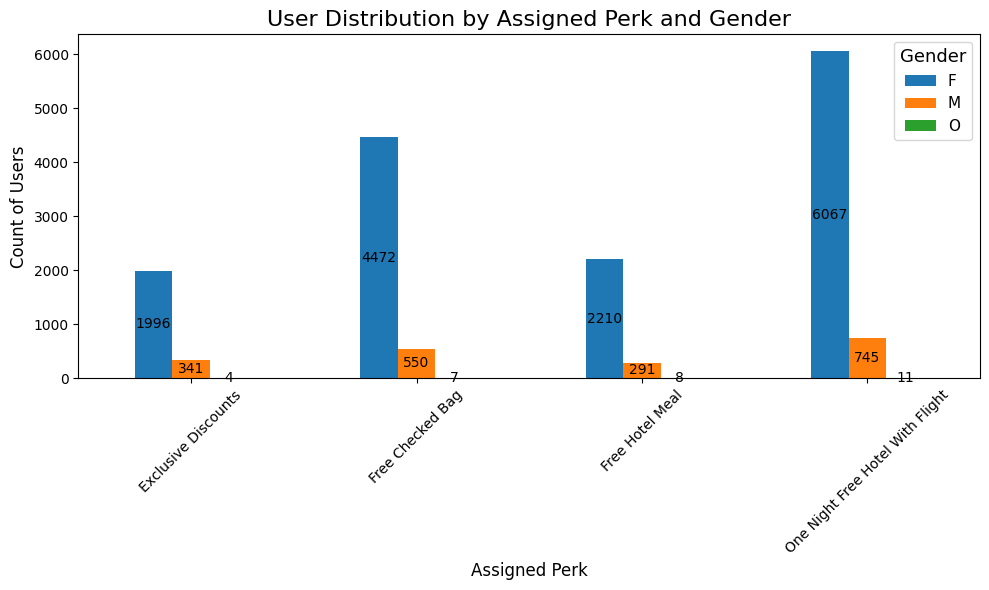

In [ ]:
# Count the occurrences based on assigned_perk and gender
count_data = df.groupby(['assigned_perk', 'gender']).size().unstack(fill_value=0)

# Plotting a bar chart
ax = count_data.plot(kind='bar', stacked=False, figsize=(10, 6))

# Add labels on the bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2  # Position the label at the center of each bar
    y = p.get_y() + height / 2  # Place the label in the middle of each segment
    ax.text(x, y, str(int(height)), ha='center', va='center', fontsize=10, color='black')

# Customize the plot
plt.title('User Distribution by Assigned Perk and Gender', fontsize=16)
plt.xlabel('Assigned Perk', fontsize=12)
plt.ylabel('Count of Users', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Gender', title_fontsize='13', fontsize='11')

# Show the plot
plt.tight_layout()
plt.show()

### Proportion of Group Travelers, with kids, by gender

<ipython-input-56-1cbaec3bd946>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped, x='gender', y='user_id_count', hue='groups_travelers', ci=None, palette='Set2')


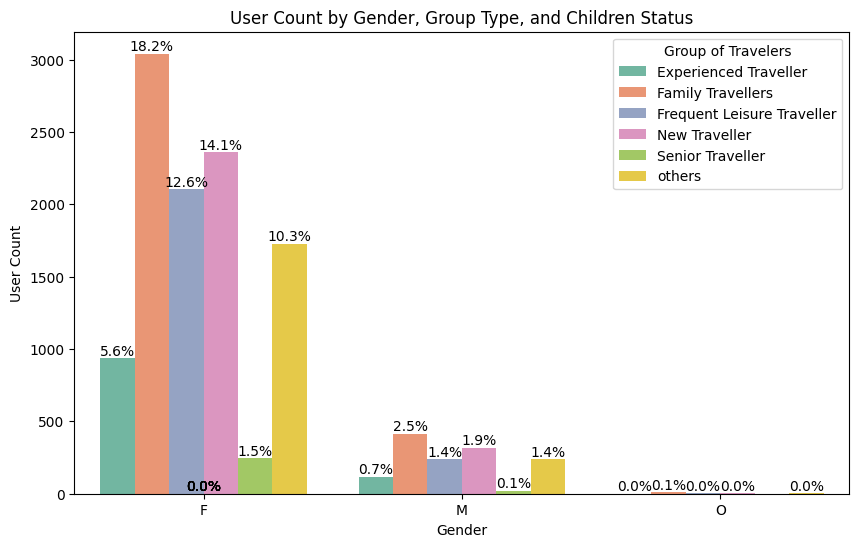

In [ ]:
# Group by the specified columns and count the occurrences
grouped = df.groupby(['gender', 'groups_travelers', 'has_children']).size().reset_index(name='user_id_count')

# Calculate percentages within each gender (or as per your requirement)
total_count = grouped['user_id_count'].sum()  # Get total count of all users
grouped['percentage'] = (grouped['user_id_count'] / total_count) * 100  # Calculate percentage

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='gender', y='user_id_count', hue='groups_travelers', ci=None, palette='Set2')

# Add labels with percentage values
for p in plt.gca().patches:
    height = p.get_height()
    percentage = (height / total_count) * 100
    plt.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{percentage:.1f}%', ha="center", va="bottom", fontsize=10)

# Add labels
plt.title('User Count by Gender, Group Type, and Children Status')
plt.xlabel('Gender')
plt.ylabel('User Count')
plt.legend(title='Group of Travelers', loc='upper right')

# Show the plot
plt.show()

### Number of unique users by Group Travelers, with kids and Gender

<ipython-input-57-3bb61f656075>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped, x='gender', y='user_id_count', hue='groups_travelers', ci=None, palette='Set2')


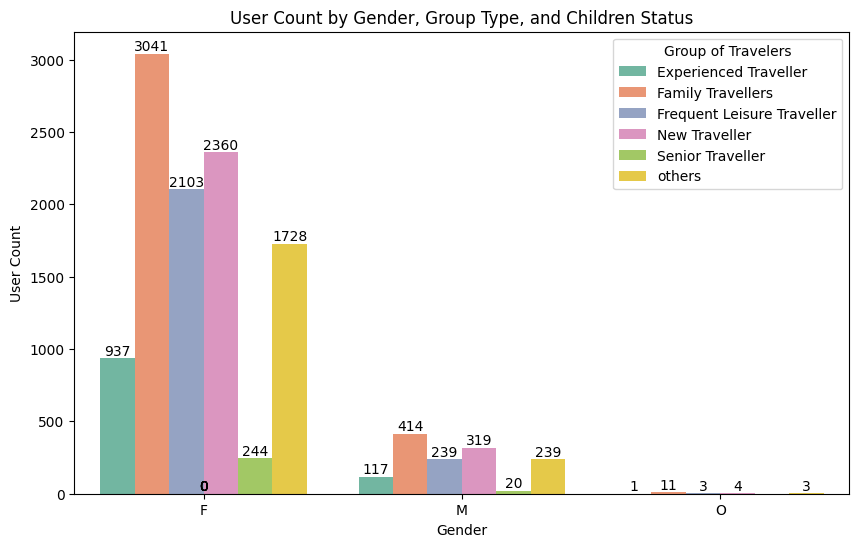

In [ ]:
# Group by the specified columns and count the occurrences
grouped = df.groupby(['gender', 'groups_travelers', 'has_children']).size().reset_index(name='user_id_count')

# Plot using seaborn (barplot)
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped, x='gender', y='user_id_count', hue='groups_travelers', ci=None, palette='Set2')

# Add labels on top of each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.1, f'{int(height)}', ha="center", va="bottom", fontsize=10)

# Add labels and title
plt.title('User Count by Gender, Group Type, and Children Status')
plt.xlabel('Gender')
plt.ylabel('User Count')
plt.legend(title='Group of Travelers', loc='upper right')

# Show the plot
plt.show()

### Demographic Characteristics: Map

In [ ]:
pip install basemap

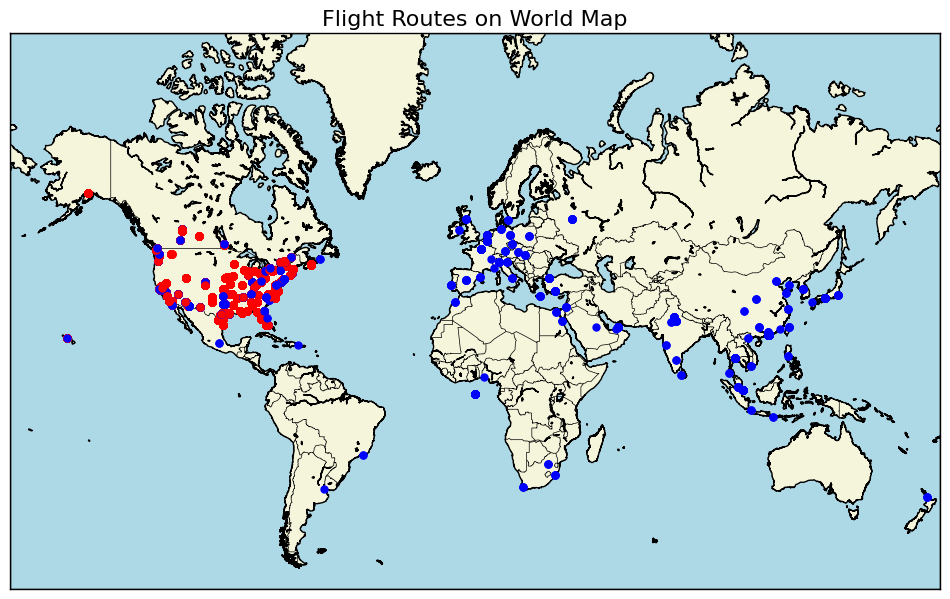

In [ ]:

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd

# Create the map
plt.figure(figsize=(12, 8))
m = Basemap(projection='merc', resolution='i', area_thresh=1000.0,
            llcrnrlon=-180, llcrnrlat=-60, urcrnrlon=180, urcrnrlat=80)

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='lightblue')
m.fillcontinents(color='beige', lake_color='lightblue')

# Plot home and destination airports
for i, row in df.iterrows():
    # Plot home airport
    x, y = m(row['home_airport_lon'], row['home_airport_lat'])
    m.plot(x, y, 'ro', markersize=5)  # Red circle for home airport

    # Plot destination airport
    x, y = m(row['destination_airport_lon'], row['destination_airport_lat'])
    m.plot(x, y, 'bo', markersize=5)  # Blue circle for destination airport


# Add labels
plt.title('Flight Routes on World Map', fontsize=16)
plt.show()